# Advanced Feature Engineering Techniques

## Learning Objectives
By the end of this notebook, you will be able to:
- Master numerical feature transformations and scaling techniques
- Apply advanced categorical encoding methods
- Create meaningful derived features and interactions
- Handle time series feature engineering
- Implement text and image feature extraction
- Use automated feature engineering tools
- Evaluate and select optimal features

---

## What is Feature Engineering?

Feature engineering is often called the "art" of machine learning because it requires creativity, domain knowledge, and systematic experimentation. It's the process of transforming raw data into features that better represent the underlying problem to predictive models.

**Why Feature Engineering Matters:**
- Can improve model performance more than algorithm selection
- Often the difference between a mediocre and excellent model
- Requires understanding both the data and the business problem
- Can reduce the need for complex models

**The Feature Engineering Pipeline:**
1. **Data Understanding**: Explore and understand your raw data
2. **Feature Creation**: Generate new features from existing ones
3. **Feature Transformation**: Apply mathematical transformations
4. **Feature Selection**: Choose the most relevant features
5. **Feature Validation**: Test feature quality and stability

---

## Part 1: Numerical Feature Engineering

### 1.1 Statistical Transformations

Numerical features often benefit from mathematical transformations to:
- Normalize distributions
- Reduce the impact of outliers
- Make relationships more linear
- Stabilize variance

**Common Transformations:**
- **Log Transform**: `log(x + 1)` for skewed distributions
- **Square Root**: `sqrt(x)` for count data
- **Box-Cox**: Automatically finds optimal power transformation
- **Yeo-Johnson**: Box-Cox variant that handles negative values
- **Quantile Transform**: Maps to uniform or normal distribution

### 1.2 Scaling and Normalization

Different algorithms require different feature scales:
- **StandardScaler**: Mean=0, Std=1 (assumes normal distribution)
- **MinMaxScaler**: Scale to [0,1] range
- **RobustScaler**: Uses median and IQR (robust to outliers)
- **QuantileUniformScaler**: Maps to uniform distribution
- **PowerTransformer**: Combines scaling with distribution transformation

### 1.3 Binning and Discretization

Converting continuous variables to discrete can:
- Capture non-linear relationships
- Reduce noise in data
- Handle outliers
- Create interpretable features

**Methods:**
- **Equal-width binning**: Divide range into equal intervals
- **Equal-frequency binning**: Each bin has same number of samples
- **Custom binning**: Domain-specific boundaries
- **Decision tree binning**: Use tree splits as boundaries

### 1.4 Interaction Features

Combining features can capture complex relationships:
- **Arithmetic operations**: Addition, subtraction, multiplication, division
- **Polynomial features**: x₁², x₁x₂, x₂², etc.
- **Custom domain interactions**: Based on business logic

---

## Part 2: Categorical Feature Engineering

### 2.1 Encoding Techniques

**Basic Encoding:**
- **Label Encoding**: Assign integers (for ordinal data)
- **One-Hot Encoding**: Binary columns for each category
- **Binary Encoding**: Represent categories in binary

**Advanced Encoding:**
- **Target Encoding**: Use target statistics (mean, median)
- **Frequency Encoding**: Use category frequency
- **Weight of Evidence (WoE)**: Logarithmic encoding based on target
- **Leave-One-Out Encoding**: Target encoding with cross-validation
- **Catboost Encoding**: Ordered target statistics

### 2.2 Handling High Cardinality

For categories with many unique values:
- **Grouping rare categories**: Combine infrequent categories
- **Hash encoding**: Use hash functions to reduce dimensionality
- **Embedding**: Learn dense representations (especially for neural networks)

---

## Part 3: Time Series Feature Engineering

### 3.1 Temporal Features

Extract meaningful components from timestamps:
- **Basic**: Year, month, day, hour, minute, second
- **Cyclical**: Day of week, month of year, hour of day
- **Derived**: Quarter, week of year, day of year
- **Business**: Is weekend, is holiday, is business hour

### 3.2 Lag Features

Use historical values as predictors:
- **Simple lags**: Previous 1, 2, 3... time steps
- **Rolling statistics**: Moving averages, rolling standard deviation
- **Exponential smoothing**: Weighted historical averages
- **Seasonal lags**: Previous week/month/year same period

### 3.3 Change Features

Capture trends and patterns:
- **Differences**: First and second order differences
- **Percentage changes**: Relative changes over time
- **Trend indicators**: Is increasing/decreasing over window
- **Volatility measures**: Standard deviation over rolling window

---

## Part 4: Text Feature Engineering

### 4.1 Basic Text Processing

**Preprocessing Steps:**
- **Cleaning**: Remove HTML, special characters, extra whitespace
- **Normalization**: Lowercase, remove accents
- **Tokenization**: Split into words/tokens
- **Stop word removal**: Remove common words
- **Stemming/Lemmatization**: Reduce words to root forms

### 4.2 Feature Extraction

**Count-based Features:**
- **Bag of Words (BoW)**: Word frequency vectors
- **TF-IDF**: Term frequency-inverse document frequency
- **N-grams**: Sequences of n consecutive words
- **Character n-grams**: Character-level sequences

**Advanced Features:**
- **Word Embeddings**: Dense vector representations (Word2Vec, GloVe)
- **Document Embeddings**: Doc2Vec, sentence transformers
- **Topic Models**: LDA topic distributions
- **Sentiment Scores**: Polarity and subjectivity

### 4.3 Text Statistics

**Length Features:**
- Character count, word count, sentence count
- Average word length, average sentence length
- Unique word ratio

**Linguistic Features:**
- Part-of-speech tag frequencies
- Named entity counts
- Readability scores
- Language detection confidence

---

## Part 5: Image Feature Engineering

### 5.1 Low-level Features

**Statistical Features:**
- **Color histograms**: Distribution of pixel intensities
- **Texture features**: Local Binary Patterns (LBP), Gray Level Co-occurrence Matrix (GLCM)
- **Edge features**: Sobel, Canny edge detection statistics
- **Geometric features**: Shape moments, contour properties

### 5.2 Traditional Computer Vision

**Feature Descriptors:**
- **SIFT/SURF**: Scale-invariant feature transform
- **HOG**: Histogram of Oriented Gradients
- **ORB**: Oriented FAST and Rotated BRIEF
- **Haar wavelets**: Multi-scale image decomposition

### 5.3 Deep Learning Features

**Pre-trained CNN Features:**
- **Transfer learning**: Use pre-trained models as feature extractors
- **Feature maps**: Intermediate layer activations
- **Fine-tuning**: Adapt pre-trained models to specific domains

---

# Practical Implementation

Let's implement these feature engineering techniques with real datasets:

In [5]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import comprehensive libraries for feature engineering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Sklearn for preprocessing and feature engineering
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, RobustScaler, 
                                 PowerTransformer, QuantileTransformer, 
                                 LabelEncoder, OneHotEncoder, OrdinalEncoder)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# For advanced feature engineering
from scipy import stats
from scipy.stats import boxcox, yeojohnson
import category_encoders as ce

# For text processing
import re
import string
from collections import Counter

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Dataset 1: House Prices - Comprehensive Numerical Feature Engineering

In [17]:
# Create a synthetic house prices dataset with various feature types
np.random.seed(42)
n_samples = 2000


# Generate base features
data = {
    'lot_size': np.random.gamma(2, 2000, n_samples),  # Skewed distribution
    'house_age': np.random.exponential(10, n_samples),  # Exponential distribution (FIXED)
    'bedrooms': np.random.poisson(3, n_samples) + 1,  # Count data
    'bathrooms': np.random.normal(2.5, 0.8, n_samples),  # Normally distributed
    'garage_size': np.random.choice([0, 1, 2, 3], n_samples, p=[0.1, 0.3, 0.5, 0.1]),
    'basement_area': np.random.gamma(1.5, 400, n_samples),
    'living_area': np.random.normal(1800, 400, n_samples),
    'latitude': np.random.normal(40.7, 0.1, n_samples),
    'longitude': np.random.normal(-74.0, 0.1, n_samples),
    'neighborhood': np.random.choice(['Downtown', 'Suburbs', 'Rural', 'Waterfront'], n_samples, p=[0.3, 0.5, 0.15, 0.05]),
    'house_style': np.random.choice(['Colonial', 'Ranch', 'Victorian', 'Modern', 'Craftsman'], n_samples, p=[0.25, 0.3, 0.15, 0.2, 0.1]),
    'heating_type': np.random.choice(['Gas', 'Electric', 'Oil', 'Solar'], n_samples, p=[0.6, 0.25, 0.1, 0.05]),
}

# Add some categorical features
data['neighborhood'] = np.random.choice(['Downtown', 'Suburbs', 'Rural', 'Waterfront'], 
                                       n_samples, p=[0.3, 0.5, 0.15, 0.05])
data['house_style'] = np.random.choice(['Colonial', 'Ranch', 'Victorian', 'Modern', 'Craftsman'], 
                                      n_samples, p=[0.25, 0.3, 0.15, 0.2, 0.1])
data['heating_type'] = np.random.choice(['Gas', 'Electric', 'Oil', 'Solar'], 
                                       n_samples, p=[0.6, 0.25, 0.1, 0.05])

# Create target variable with realistic relationships
price_base = (
    data['living_area'] * 120 +
    data['lot_size'] * 15 +
    data['bedrooms'] * 8000 +
    data['bathrooms'] * 12000 +
    data['garage_size'] * 5000 +
    data['basement_area'] * 35 +
    (25 - data['house_age']) * 2000
)

# Neighborhood effect
neighborhood_multiplier = {'Downtown': 1.4, 'Suburbs': 1.0, 'Rural': 0.8, 'Waterfront': 1.8}
for i, neighborhood in enumerate(data['neighborhood']):
    price_base[i] *= neighborhood_multiplier[neighborhood]

# Add noise
data['price'] = price_base + np.random.normal(0, 15000, n_samples)
data['price'] = np.maximum(data['price'], 50000)

# Convert to DataFrame
df_houses = pd.DataFrame(data)

print("House Prices Dataset:")
print(f"Shape: {df_houses.shape}")
print("\nBasic Statistics:")
print(df_houses.describe())

print("\nCategorical Value Counts:")
for col in ['neighborhood', 'house_style', 'heating_type']:
    print(f"\n{col}:")
    print(df_houses[col].value_counts())

House Prices Dataset:
Shape: (2000, 13)

Basic Statistics:
           lot_size    house_age     bedrooms    bathrooms  garage_size  \
count   2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    4092.081009    10.009400     3.941000     2.511649     1.640500   
std     2845.081744    10.038240     1.705278     0.802087     0.781387   
min       51.720970     0.002271     1.000000    -0.156892     0.000000   
25%     1998.877433     2.835373     3.000000     1.988338     1.000000   
50%     3456.667074     6.765444     4.000000     2.508856     2.000000   
75%     5383.357436    13.961643     5.000000     3.026017     2.000000   
max    27220.465369    75.252034    11.000000     5.243128     3.000000   

       basement_area  living_area     latitude    longitude          price  
count    2000.000000  2000.000000  2000.000000  2000.000000    2000.000000  
mean      611.755384  1805.564533    40.700324   -73.999335  447066.912810  
std       491.885572   404.430806 

# 1. NUMERICAL FEATURE TRANSFORMATIONS

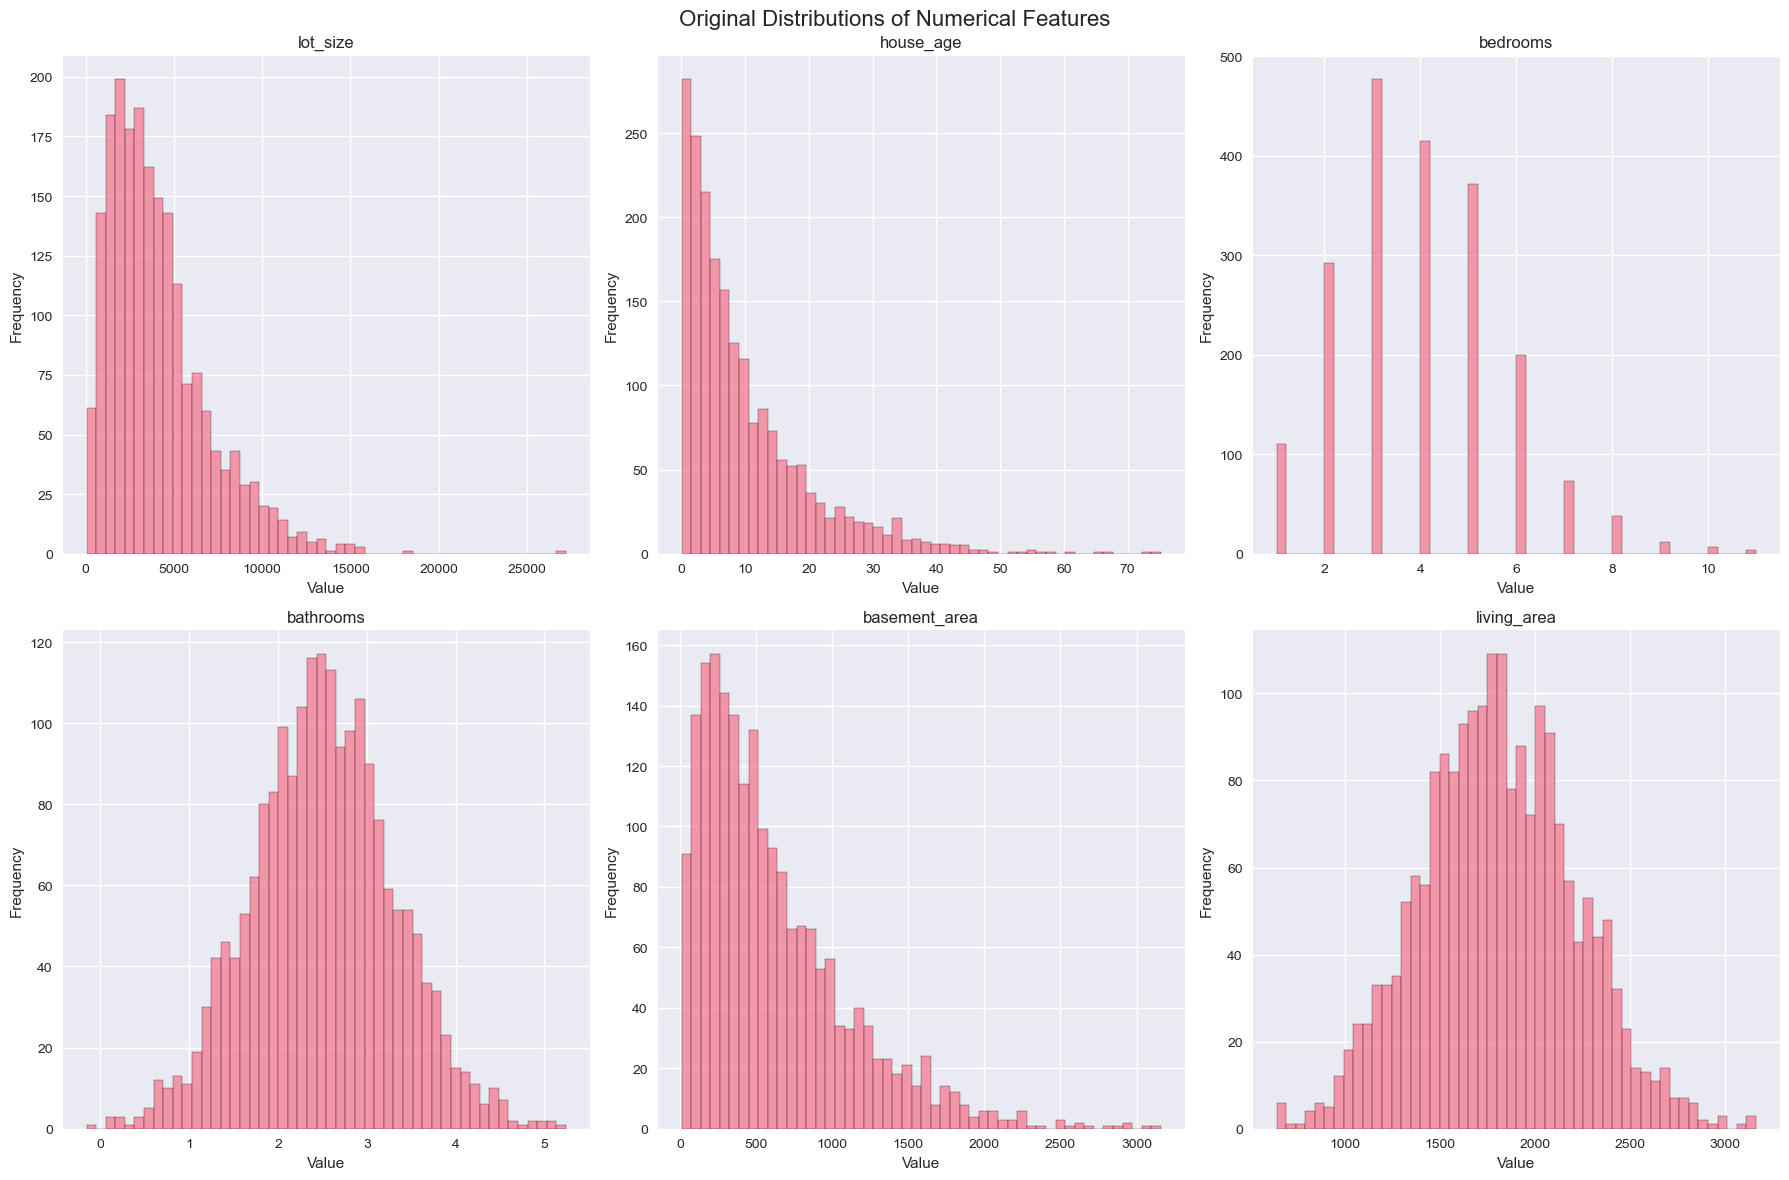

Skewness of numerical features:
lot_size: 1.405
house_age: 1.867
bedrooms: 0.606
bathrooms: 0.039
basement_area: 1.432
living_area: 0.102


In [19]:
# Analyze distributions before transformation
numerical_cols = ['lot_size', 'house_age', 'bedrooms', 'bathrooms', 'basement_area', 'living_area']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Original Distributions of Numerical Features', fontsize=16)

for i, col in enumerate(numerical_cols):
    row, col_idx = i // 3, i % 3
    axes[row, col_idx].hist(df_houses[col], bins=50, alpha=0.7, edgecolor='black')
    axes[row, col_idx].set_title(f'{col}')
    axes[row, col_idx].set_xlabel('Value')
    axes[row, col_idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Check skewness
print("Skewness of numerical features:")
for col in numerical_cols:
    skewness = stats.skew(df_houses[col])
    print(f"{col}: {skewness:.3f}")

Box-Cox lambda for lot_size: 0.303
Box-Cox lambda for basement_area: 0.270


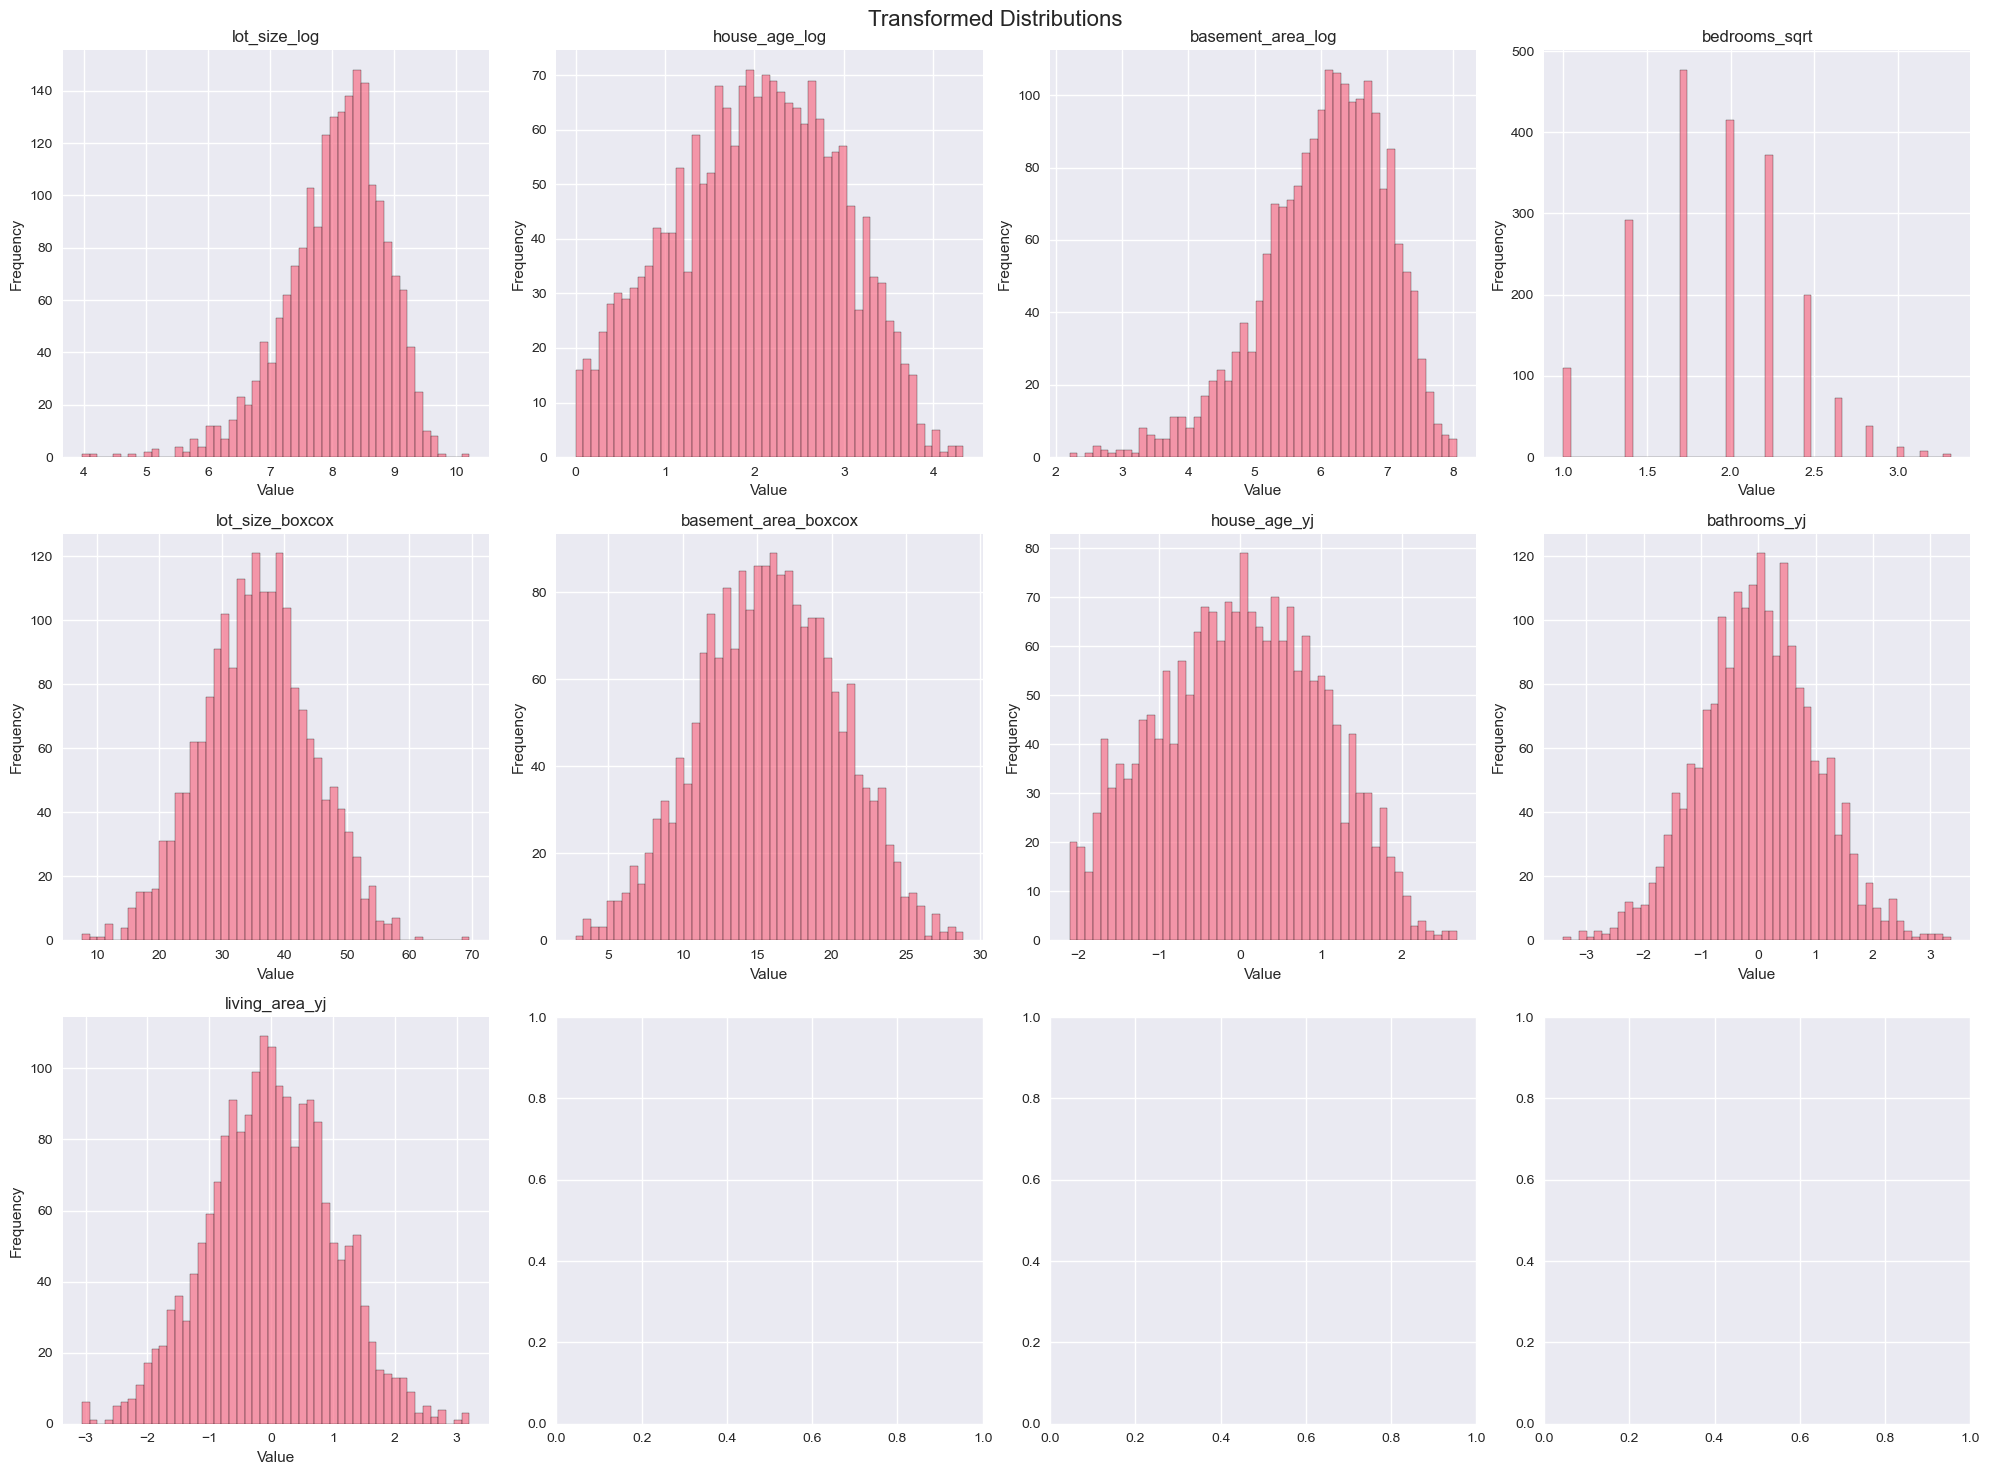


Skewness after transformation:
lot_size_log: -0.772
house_age_log: -0.106
basement_area_log: -0.708
bedrooms_sqrt: -0.048
lot_size_boxcox: -0.012
basement_area_boxcox: -0.031
house_age_yj: -0.012
bathrooms_yj: 0.006
living_area_yj: -0.005


In [21]:
# Apply various transformations to handle skewness
df_transformed = df_houses.copy()

# Log transformation for highly skewed features
highly_skewed = ['lot_size', 'house_age', 'basement_area']
for col in highly_skewed:
    df_transformed[f'{col}_log'] = np.log1p(df_transformed[col])

# Square root transformation for count-like data
df_transformed['bedrooms_sqrt'] = np.sqrt(df_transformed['bedrooms'])

# Box-Cox transformation (requires positive values)
for col in ['lot_size', 'basement_area']:
    if df_transformed[col].min() > 0:
        transformed_data, lambda_param = boxcox(df_transformed[col])
        df_transformed[f'{col}_boxcox'] = transformed_data
        print(f"Box-Cox lambda for {col}: {lambda_param:.3f}")

# Yeo-Johnson transformation (handles negative values)
pt = PowerTransformer(method='yeo-johnson')
yj_features = ['house_age', 'bathrooms', 'living_area']
yj_transformed = pt.fit_transform(df_transformed[yj_features])
for i, col in enumerate(yj_features):
    df_transformed[f'{col}_yj'] = yj_transformed[:, i]

# Compare distributions after transformation
transform_cols = [col for col in df_transformed.columns if any(suffix in col for suffix in ['_log', '_sqrt', '_boxcox', '_yj'])]

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Transformed Distributions', fontsize=16)

for i, col in enumerate(transform_cols[:12]):  # Show first 12 transformations
    row, col_idx = i // 4, i % 4
    axes[row, col_idx].hist(df_transformed[col], bins=50, alpha=0.7, edgecolor='black')
    axes[row, col_idx].set_title(f'{col}')
    axes[row, col_idx].set_xlabel('Value')
    axes[row, col_idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Check skewness after transformation
print("\nSkewness after transformation:")
for col in transform_cols:
    skewness = stats.skew(df_transformed[col])
    print(f"{col}: {skewness:.3f}")

# 2. ADVANCED SCALING TECHNIQUES

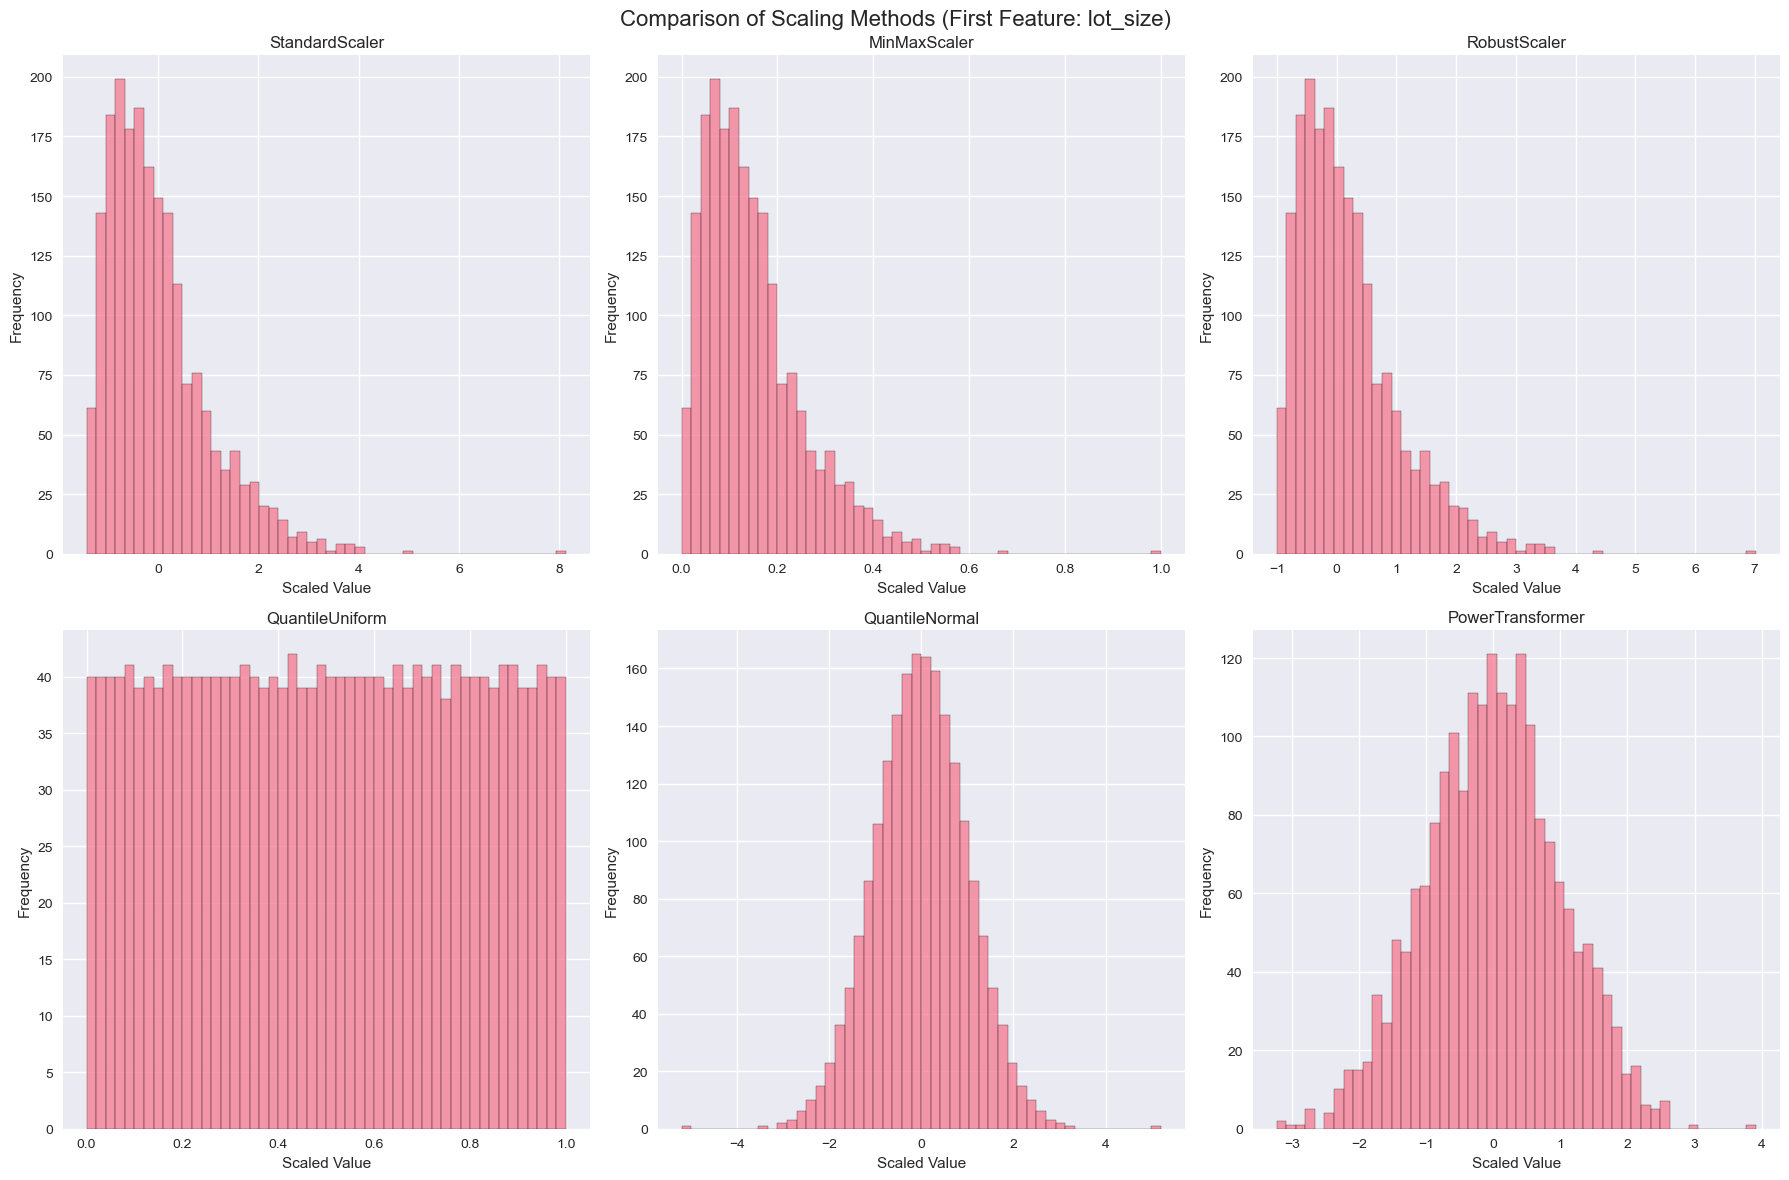

Statistical properties after scaling (lot_size feature):
Method		Mean		Std		Min		Max
------------------------------------------------------------
StandardScaler 	-0.000		1.000		-1.420		8.131
MinMaxScaler   	0.149		0.105		0.000		1.000
RobustScaler   	0.188		0.840		-1.006		7.021
QuantileUniform	0.500		0.289		0.000		1.000
QuantileNormal 	-0.000		1.010		-5.199		5.199
PowerTransformer	-0.000		1.000		-3.231		3.916


In [23]:
# Prepare features for scaling comparison
features_to_scale = ['lot_size', 'house_age', 'bedrooms', 'bathrooms', 'basement_area', 'living_area']
X_original = df_houses[features_to_scale].copy()

# Apply different scaling techniques
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'QuantileUniform': QuantileTransformer(output_distribution='uniform'),
    'QuantileNormal': QuantileTransformer(output_distribution='normal'),
    'PowerTransformer': PowerTransformer(method='yeo-johnson')
}

scaled_data = {}
for name, scaler in scalers.items():
    scaled_data[name] = scaler.fit_transform(X_original)

# Visualize scaling effects
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comparison of Scaling Methods (First Feature: lot_size)', fontsize=16)

for i, (name, data) in enumerate(scaled_data.items()):
    row, col = i // 3, i % 3
    axes[row, col].hist(data[:, 0], bins=50, alpha=0.7, edgecolor='black')  # First feature
    axes[row, col].set_title(f'{name}')
    axes[row, col].set_xlabel('Scaled Value')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Compare statistical properties
print("Statistical properties after scaling (lot_size feature):")
print("Method\t\tMean\t\tStd\t\tMin\t\tMax")
print("-" * 60)
for name, data in scaled_data.items():
    feature_data = data[:, 0]  # First feature
    print(f"{name:<15}\t{feature_data.mean():.3f}\t\t{feature_data.std():.3f}\t\t{feature_data.min():.3f}\t\t{feature_data.max():.3f}")

# 3. BINNING AND DISCRETIZATION

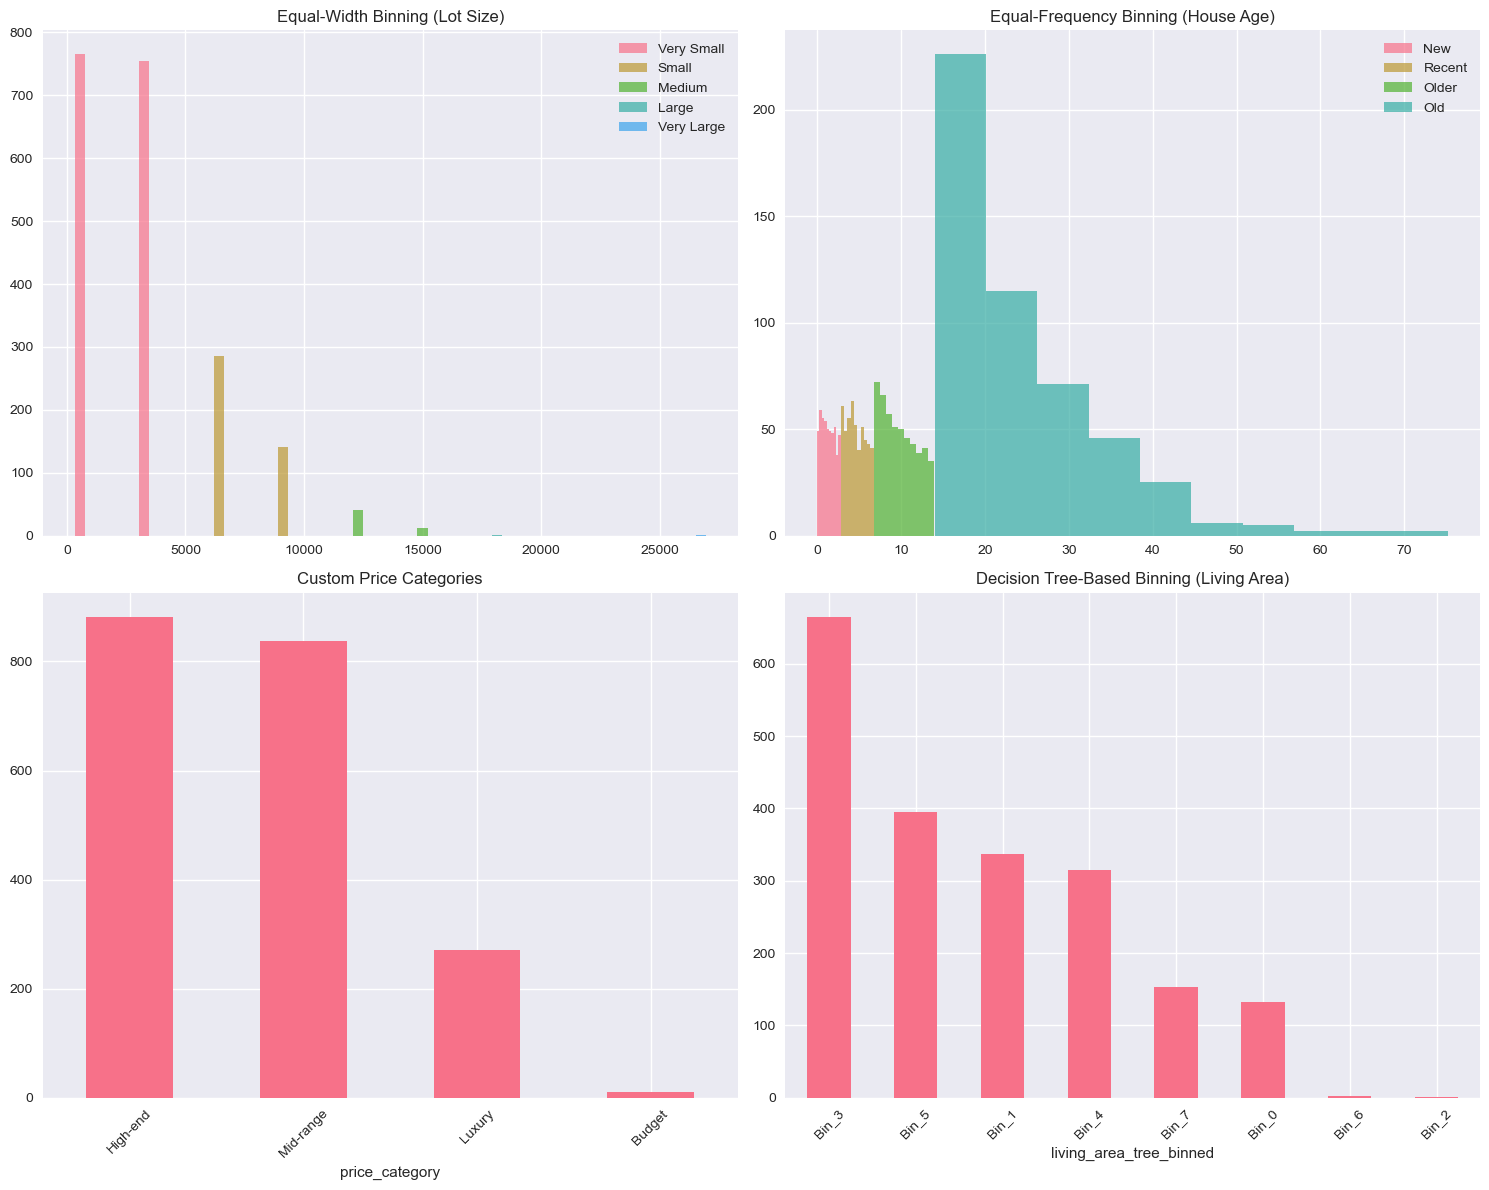

Binning Results Summary:

Lot Size Equal-Width Bins:
lot_size_binned_equal
Very Small    1519
Small          426
Medium          53
Large            1
Very Large       1
Name: count, dtype: int64

House Age Quantile Bins:
house_age_binned_quantile
New       500
Recent    500
Older     500
Old       500
Name: count, dtype: int64

Price Categories:
price_category
High-end     882
Mid-range    837
Luxury       271
Budget        10
Name: count, dtype: int64


In [27]:
# Equal-width binning
df_houses['lot_size_binned_equal'] = pd.cut(df_houses['lot_size'], bins=5, labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'])

# Equal-frequency binning (quantile-based)
df_houses['house_age_binned_quantile'] = pd.qcut(df_houses['house_age'], q=4, labels=['New', 'Recent', 'Older', 'Old'])

# Custom binning based on domain knowledge
def custom_price_bins(price):
    if price < 200000:
        return 'Budget'
    elif price < 400000:
        return 'Mid-range'
    elif price < 600000:
        return 'High-end'
    else:
        return 'Luxury'

df_houses['price_category'] = df_houses['price'].apply(custom_price_bins)

# Decision tree-based binning
from sklearn.tree import DecisionTreeRegressor

# Use decision tree to find optimal split points
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(df_houses[['living_area']], df_houses['price'])

# Extract split points
tree_splits = []
def extract_splits(tree, node=0, depth=0):
    if tree.tree_.children_left[node] != tree.tree_.children_right[node]:  # Not a leaf
        threshold = tree.tree_.threshold[node]
        tree_splits.append(threshold)
        extract_splits(tree, tree.tree_.children_left[node], depth + 1)
        extract_splits(tree, tree.tree_.children_right[node], depth + 1)

extract_splits(tree)
tree_splits = sorted(list(set(tree_splits)))

# Create bins based on tree splits
df_houses['living_area_tree_binned'] = pd.cut(df_houses['living_area'], 
                                            bins=[-np.inf] + tree_splits + [np.inf], 
                                            labels=[f'Bin_{i}' for i in range(len(tree_splits) + 1)])

# Visualize binning results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Equal-width binning
axes[0, 0].hist([df_houses[df_houses['lot_size_binned_equal'] == cat]['lot_size'] for cat in df_houses['lot_size_binned_equal'].cat.categories], 
               label=df_houses['lot_size_binned_equal'].cat.categories, alpha=0.7)
axes[0, 0].set_title('Equal-Width Binning (Lot Size)')
axes[0, 0].legend()

# Equal-frequency binning
for i, cat in enumerate(df_houses['house_age_binned_quantile'].cat.categories):
    subset = df_houses[df_houses['house_age_binned_quantile'] == cat]['house_age']
    axes[0, 1].hist(subset, alpha=0.7, label=cat)
axes[0, 1].set_title('Equal-Frequency Binning (House Age)')
axes[0, 1].legend()

# Custom binning
df_houses['price_category'].value_counts().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Custom Price Categories')
axes[1, 0].tick_params(axis='x', rotation=45)

# Tree-based binning
df_houses['living_area_tree_binned'].value_counts().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Decision Tree-Based Binning (Living Area)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Binning Results Summary:")
print("\nLot Size Equal-Width Bins:")
print(df_houses['lot_size_binned_equal'].value_counts())
print("\nHouse Age Quantile Bins:")
print(df_houses['house_age_binned_quantile'].value_counts())
print("\nPrice Categories:")
print(df_houses['price_category'].value_counts())

# 4. INTERACTION FEATURES AND POLYNOMIAL FEATURES

In [30]:
# Create meaningful interaction features based on domain knowledge
df_houses['price_per_sqft'] = df_houses['price'] / df_houses['living_area']
df_houses['total_rooms'] = df_houses['bedrooms'] + df_houses['bathrooms']
df_houses['garage_to_bedroom_ratio'] = df_houses['garage_size'] / (df_houses['bedrooms'] + 1)  # +1 to avoid division by zero
df_houses['age_living_area_interaction'] = df_houses['house_age'] * df_houses['living_area']
df_houses['lot_to_living_ratio'] = df_houses['lot_size'] / df_houses['living_area']

# Polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Select a subset of features for polynomial expansion
poly_features = ['living_area', 'lot_size', 'house_age']
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_array = poly.fit_transform(df_houses[poly_features])

# Get feature names
poly_feature_names = poly.get_feature_names_out(poly_features)
poly_df = pd.DataFrame(poly_array, columns=poly_feature_names)

print("Polynomial Features Created:")
print(poly_feature_names)
print(f"\nOriginal features: {len(poly_features)}")
print(f"After polynomial expansion: {len(poly_feature_names)}")

# Distance-based features (geographic)
# Calculate distance from city center (using Manhattan as reference)
city_center_lat, city_center_lon = 40.7831, -73.9712
df_houses['distance_from_center'] = np.sqrt((df_houses['latitude'] - city_center_lat)**2 + 
                                          (df_houses['longitude'] - city_center_lon)**2)

# Create interaction with neighborhood (one-hot encode first)
neighborhood_encoded = pd.get_dummies(df_houses['neighborhood'], prefix='neighborhood')
for col in neighborhood_encoded.columns:
    df_houses[f'distance_x_{col}'] = df_houses['distance_from_center'] * neighborhood_encoded[col]

print("\nNew Interaction Features Created:")
interaction_features = ['price_per_sqft', 'total_rooms', 'garage_to_bedroom_ratio', 
                       'age_living_area_interaction', 'lot_to_living_ratio', 'distance_from_center']
for feature in interaction_features:
    print(f"- {feature}")

# Analyze correlation with target
correlations = {}
for feature in interaction_features:
    corr = df_houses[feature].corr(df_houses['price'])
    correlations[feature] = corr

print("\nCorrelation with Price:")
for feature, corr in sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True):
    print(f"{feature}: {corr:.3f}")

Polynomial Features Created:
['living_area' 'lot_size' 'house_age' 'living_area^2'
 'living_area lot_size' 'living_area house_age' 'lot_size^2'
 'lot_size house_age' 'house_age^2']

Original features: 3
After polynomial expansion: 9

New Interaction Features Created:
- price_per_sqft
- total_rooms
- garage_to_bedroom_ratio
- age_living_area_interaction
- lot_to_living_ratio
- distance_from_center

Correlation with Price:
price_per_sqft: 0.656
lot_to_living_ratio: 0.206
total_rooms: 0.117
age_living_area_interaction: -0.052
garage_to_bedroom_ratio: 0.014
distance_from_center: -0.001


# 5. CATEGORICAL FEATURE ENGINEERING

Categorical Encoding Comparison:
Original categorical features: 3
After one-hot encoding: 13 features
Label encoding: 3 features (same number, different representation)
Target encoding: 3 features
Frequency encoding: 3 features
WoE encoding: 3 features

Encoding Comparison for Neighborhood:
                       neighborhood_label  neighborhood_target  \
neighborhood_original                                            
Downtown                                0            559760.70   
Rural                                   1            315258.73   
Suburbs                                 2            401006.33   
Waterfront                              3            701443.63   

                       neighborhood_freq  neighborhood_woe      price  
neighborhood_original                                                  
Downtown                             577              2.45  559760.70  
Rural                                313             -3.07  315258.73  
Suburbs                

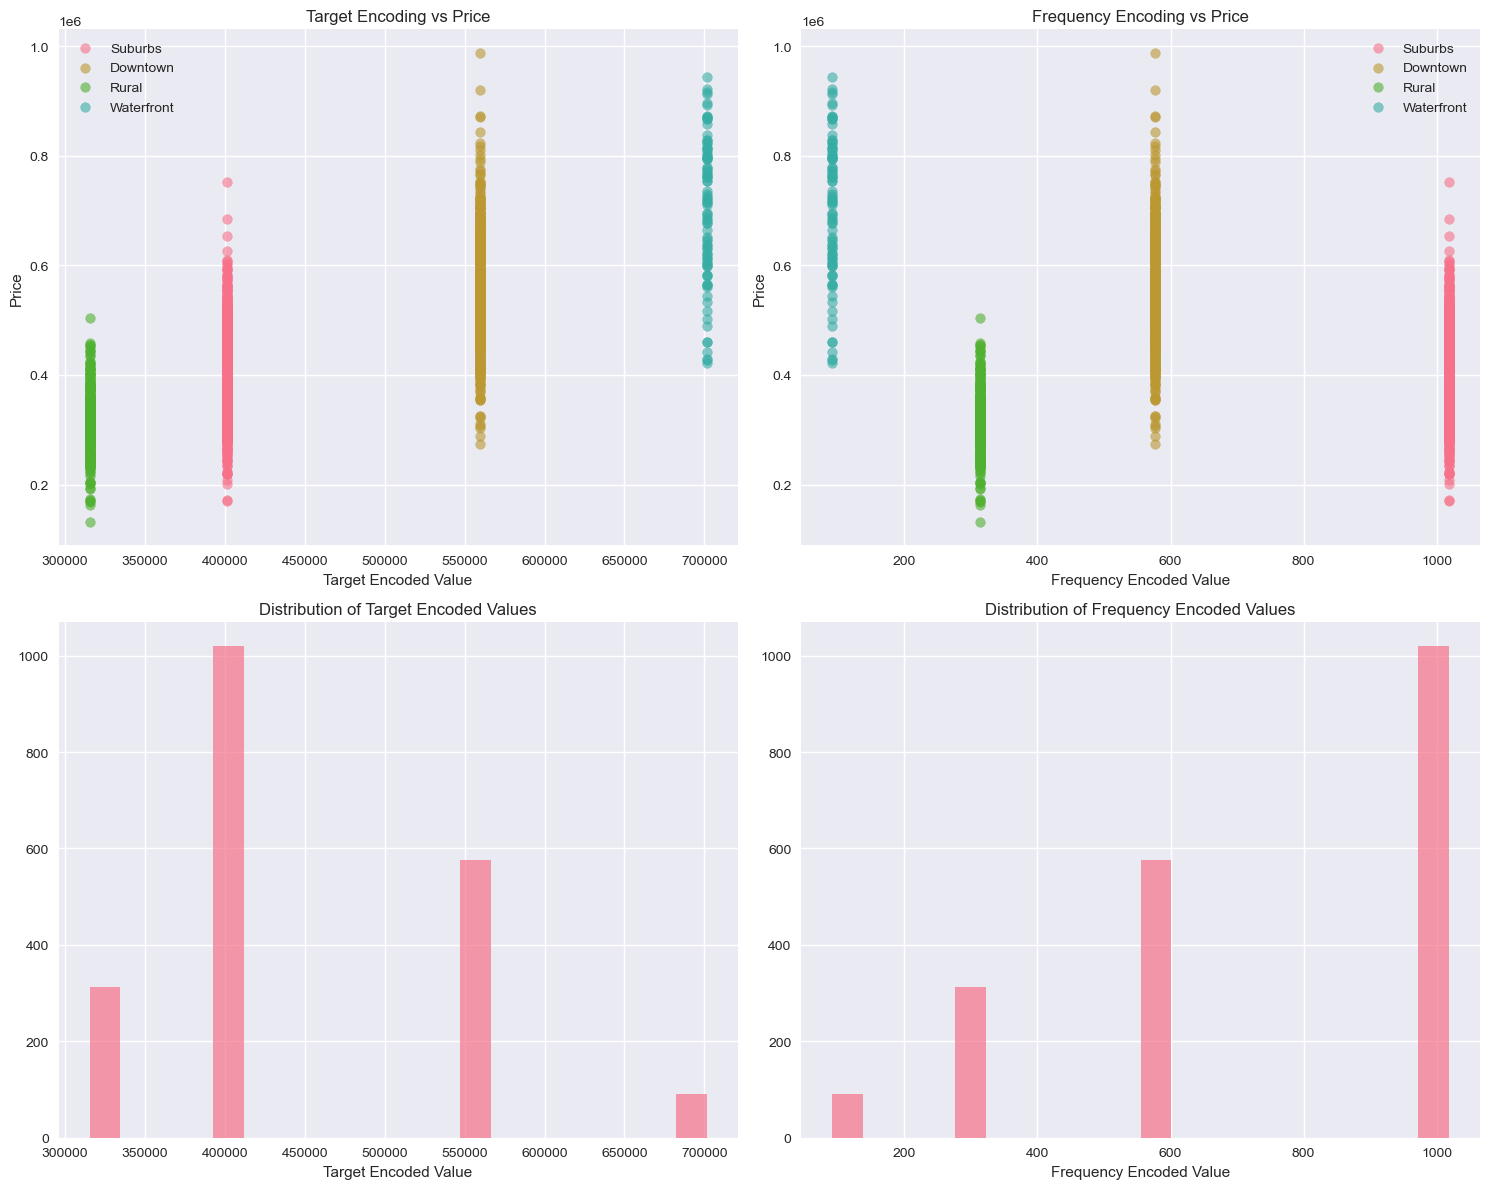

In [35]:
# Basic encoding comparison
categorical_features = ['neighborhood', 'house_style', 'heating_type']

# Label Encoding
le_data = {}
for col in categorical_features:
    le = LabelEncoder()
    le_data[f'{col}_label'] = le.fit_transform(df_houses[col])

# One-Hot Encoding
ohe_data = pd.get_dummies(df_houses[categorical_features], prefix=categorical_features)

# Advanced encoding techniques using category_encoders
# Target Encoding (mean encoding)
target_encoder = ce.TargetEncoder(cols=categorical_features)
target_encoded = target_encoder.fit_transform(df_houses[categorical_features], df_houses['price'])
target_encoded.columns = [f'{col}_target' for col in categorical_features]

# Frequency Encoding
freq_encoded = df_houses[categorical_features].copy()
for col in categorical_features:
    freq_map = df_houses[col].value_counts().to_dict()
    freq_encoded[f'{col}_freq'] = df_houses[col].map(freq_map)

# Merge selected encoded columns into the main DataFrame
df_houses['neighborhood_target'] = target_encoded['neighborhood_target']
df_houses['neighborhood_freq'] = freq_encoded['neighborhood_freq']

# Weight of Evidence Encoding
woe_encoder = ce.WOEEncoder(cols=categorical_features)
# Create binary target for WoE (high vs low price)
binary_target = (df_houses['price'] > df_houses['price'].median()).astype(int)
woe_encoded = woe_encoder.fit_transform(df_houses[categorical_features], binary_target)
woe_encoded.columns = [f'{col}_woe' for col in categorical_features]

print("Categorical Encoding Comparison:")
print(f"Original categorical features: {len(categorical_features)}")
print(f"After one-hot encoding: {ohe_data.shape[1]} features")
print(f"Label encoding: {len(categorical_features)} features (same number, different representation)")
print(f"Target encoding: {len(categorical_features)} features")
print(f"Frequency encoding: {len(categorical_features)} features")
print(f"WoE encoding: {len(categorical_features)} features")

# Compare encoding effectiveness
encoding_comparison = pd.DataFrame({
    'neighborhood_original': df_houses['neighborhood'],
    'neighborhood_label': le_data['neighborhood_label'],
    'neighborhood_target': target_encoded['neighborhood_target'],
    'neighborhood_freq': freq_encoded['neighborhood_freq'],
    'neighborhood_woe': woe_encoded['neighborhood_woe'],
    'price': df_houses['price']
})

print("\nEncoding Comparison for Neighborhood:")
print(encoding_comparison.groupby('neighborhood_original').agg({
    'neighborhood_label': 'first',
    'neighborhood_target': 'first',
    'neighborhood_freq': 'first',
    'neighborhood_woe': 'first',
    'price': 'mean'
}).round(2))

# Visualize encoding effects
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Target encoding
for i, neighborhood in enumerate(df_houses['neighborhood'].unique()):
    subset = df_houses[df_houses['neighborhood'] == neighborhood]
    axes[0, 0].scatter(subset['neighborhood_target'], subset['price'], 
                      label=neighborhood, alpha=0.6)
axes[0, 0].set_xlabel('Target Encoded Value')
axes[0, 0].set_ylabel('Price')
axes[0, 0].set_title('Target Encoding vs Price')
axes[0, 0].legend()

# Frequency encoding
for neighborhood in df_houses['neighborhood'].unique():
    subset = df_houses[df_houses['neighborhood'] == neighborhood]
    axes[0, 1].scatter(subset['neighborhood_freq'], subset['price'], 
                      label=neighborhood, alpha=0.6)
axes[0, 1].set_xlabel('Frequency Encoded Value')
axes[0, 1].set_ylabel('Price')
axes[0, 1].set_title('Frequency Encoding vs Price')
axes[0, 1].legend()

# Distribution of encodings
target_encoded['neighborhood_target'].hist(bins=20, ax=axes[1, 0], alpha=0.7)
axes[1, 0].set_title('Distribution of Target Encoded Values')
axes[1, 0].set_xlabel('Target Encoded Value')

freq_encoded['neighborhood_freq'].hist(bins=20, ax=axes[1, 1], alpha=0.7)
axes[1, 1].set_title('Distribution of Frequency Encoded Values')
axes[1, 1].set_xlabel('Frequency Encoded Value')

plt.tight_layout()
plt.show()

## Dataset 2: Time Series Feature Engineering

Time Series Dataset Shape: (730, 6)
Date Range: 2022-01-01 00:00:00 to 2023-12-31 00:00:00

First few rows:
        date       sales  temperature  is_weekend  month  day_of_week
0 2022-01-01  102.483571    70.979226        True      1            5
1 2022-01-02  110.572702    65.452168        True      1            6
2 2022-01-03  119.748522    72.729225       False      1            0
3 2022-01-04  121.774181    62.518769       False      1            1
4 2022-01-05  107.000059    76.520886       False      1            2


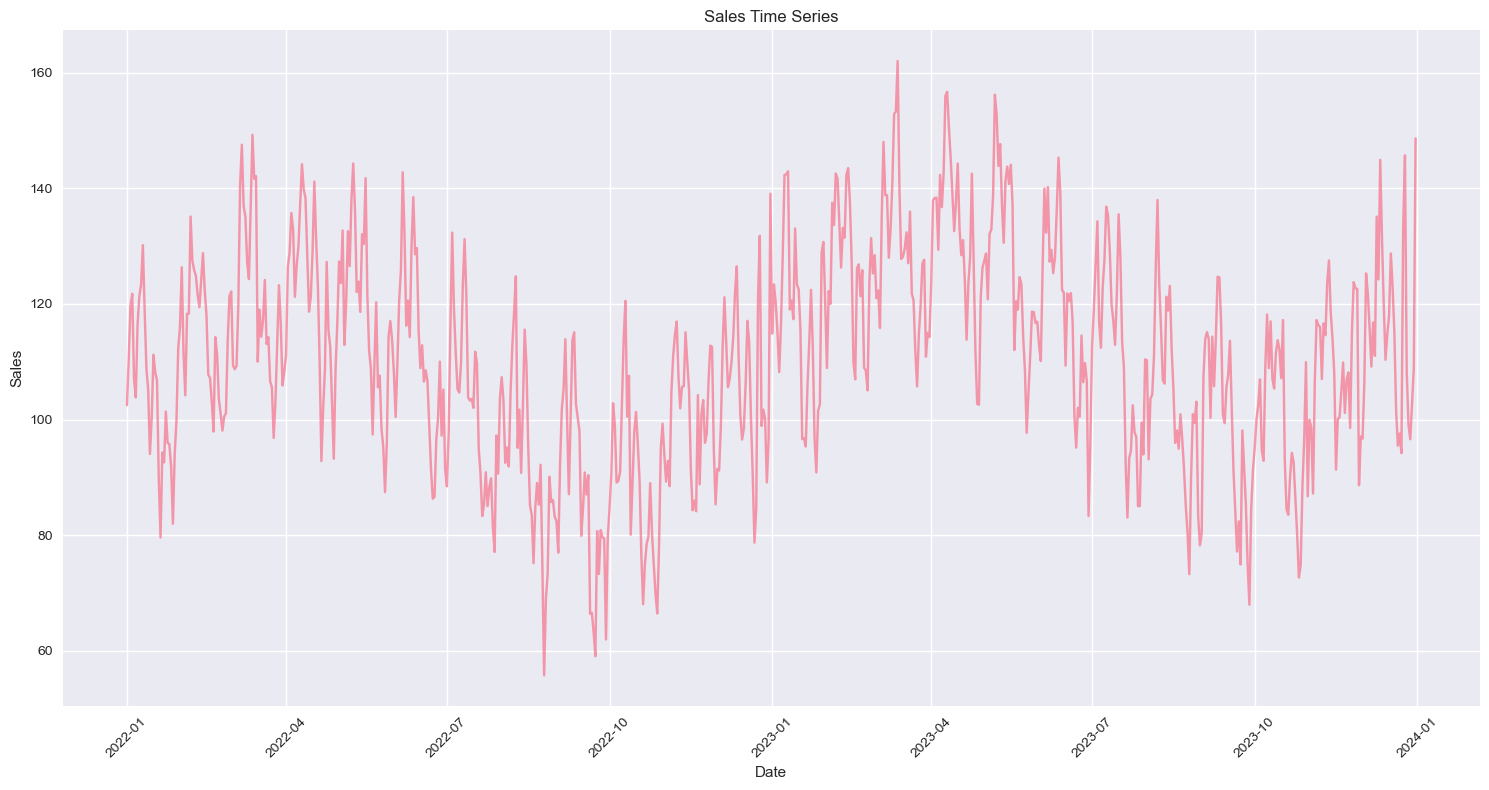

In [38]:
# Create a synthetic time series dataset (e.g., sales data)
np.random.seed(42)

# Generate 2 years of daily data
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 12, 31)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

n_days = len(date_range)

# Base trend and seasonality
trend = np.linspace(100, 120, n_days)  # Gradual upward trend
weekly_seasonality = 10 * np.sin(2 * np.pi * np.arange(n_days) / 7)  # Weekly pattern
monthly_seasonality = 15 * np.sin(2 * np.pi * np.arange(n_days) / 30.44)  # Monthly pattern
yearly_seasonality = 20 * np.sin(2 * np.pi * np.arange(n_days) / 365.25)  # Yearly pattern

# Add noise and special events
noise = np.random.normal(0, 5, n_days)
special_events = np.zeros(n_days)

# Add holiday effects (simplified)
for i, date in enumerate(date_range):
    if date.month == 12 and date.day in [24, 25, 31]:  # Christmas and New Year
        special_events[i] = 30
    elif date.month == 11 and date.day in range(22, 29):  # Thanksgiving week
        special_events[i] = 20
    elif date.month == 7 and date.day == 4:  # July 4th
        special_events[i] = 15

# Combine all components
sales = trend + weekly_seasonality + monthly_seasonality + yearly_seasonality + special_events + noise
sales = np.maximum(sales, 0)  # Ensure non-negative

# Create DataFrame
df_ts = pd.DataFrame({
    'date': date_range,
    'sales': sales
})

# Add some external factors
df_ts['temperature'] = 70 + 20 * np.sin(2 * np.pi * np.arange(n_days) / 365.25) + np.random.normal(0, 5, n_days)
df_ts['is_weekend'] = df_ts['date'].dt.weekday >= 5
df_ts['month'] = df_ts['date'].dt.month
df_ts['day_of_week'] = df_ts['date'].dt.dayofweek

print(f"Time Series Dataset Shape: {df_ts.shape}")
print(f"Date Range: {df_ts['date'].min()} to {df_ts['date'].max()}")
print("\nFirst few rows:")
print(df_ts.head())

# Visualize the time series
plt.figure(figsize=(15, 8))
plt.plot(df_ts['date'], df_ts['sales'], alpha=0.7)
plt.title('Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Temporal Features Created:
- year
- month
- day
- day_of_week
- week_of_year
- quarter
- day_of_year
- is_weekend
- is_month_start
- is_month_end
- month_sin
- month_cos
- day_of_week_sin
- day_of_week_cos


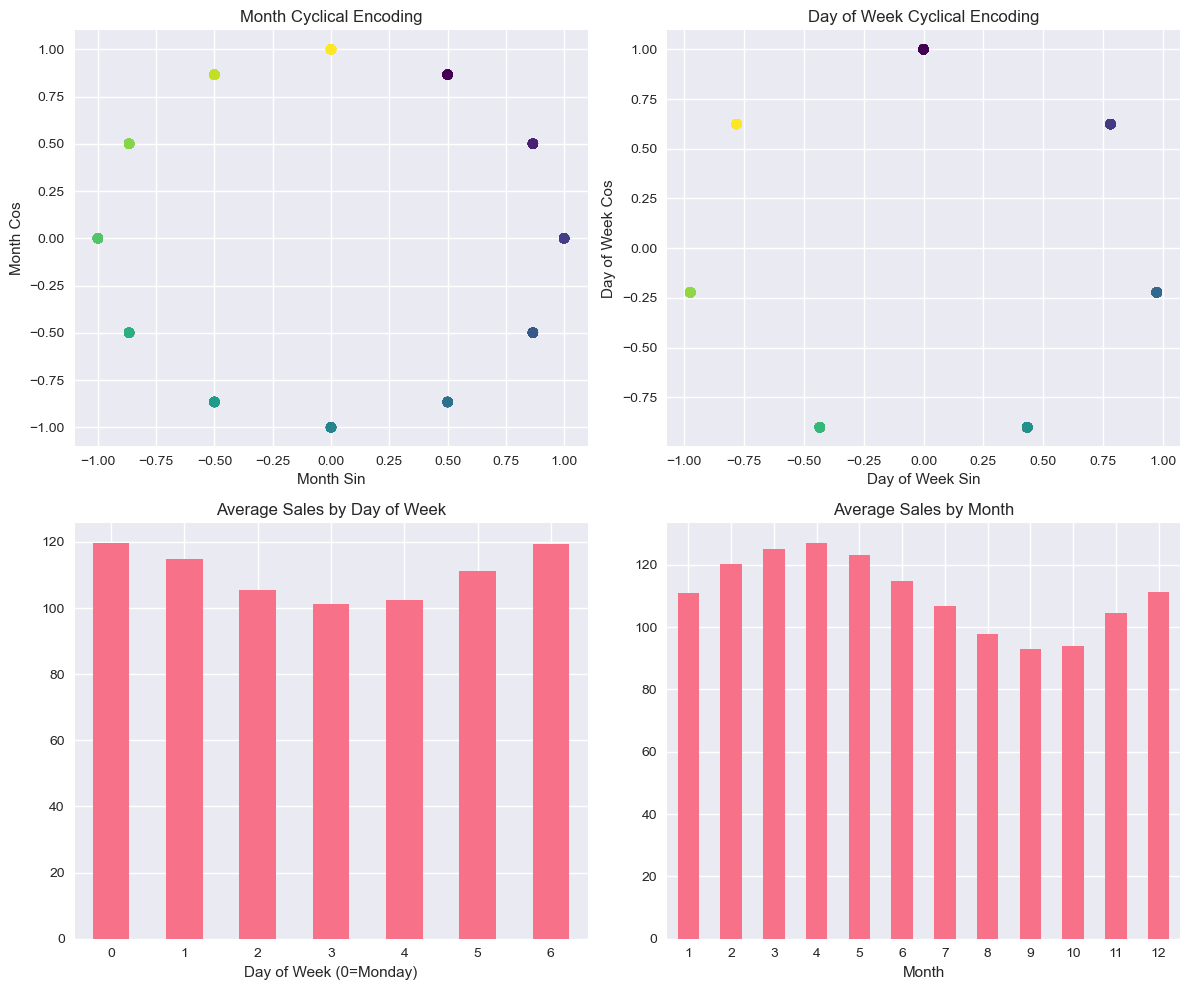

In [40]:
# TIME SERIES FEATURE ENGINEERING

# 1. TEMPORAL FEATURES
df_ts['year'] = df_ts['date'].dt.year
df_ts['month'] = df_ts['date'].dt.month
df_ts['day'] = df_ts['date'].dt.day
df_ts['day_of_week'] = df_ts['date'].dt.dayofweek
df_ts['week_of_year'] = df_ts['date'].dt.isocalendar().week
df_ts['quarter'] = df_ts['date'].dt.quarter
df_ts['day_of_year'] = df_ts['date'].dt.dayofyear

# Business temporal features
df_ts['is_weekend'] = df_ts['day_of_week'] >= 5
df_ts['is_month_start'] = df_ts['date'].dt.is_month_start
df_ts['is_month_end'] = df_ts['date'].dt.is_month_end
df_ts['is_quarter_start'] = df_ts['date'].dt.is_quarter_start
df_ts['is_quarter_end'] = df_ts['date'].dt.is_quarter_end

# Cyclical encoding (important for ML models)
df_ts['month_sin'] = np.sin(2 * np.pi * df_ts['month'] / 12)
df_ts['month_cos'] = np.cos(2 * np.pi * df_ts['month'] / 12)
df_ts['day_of_week_sin'] = np.sin(2 * np.pi * df_ts['day_of_week'] / 7)
df_ts['day_of_week_cos'] = np.cos(2 * np.pi * df_ts['day_of_week'] / 7)
df_ts['day_of_year_sin'] = np.sin(2 * np.pi * df_ts['day_of_year'] / 365.25)
df_ts['day_of_year_cos'] = np.cos(2 * np.pi * df_ts['day_of_year'] / 365.25)

print("Temporal Features Created:")
temporal_features = ['year', 'month', 'day', 'day_of_week', 'week_of_year', 'quarter', 
                    'day_of_year', 'is_weekend', 'is_month_start', 'is_month_end',
                    'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos']
for feature in temporal_features:
    print(f"- {feature}")

# Visualize cyclical encoding
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Month cyclical encoding
axes[0, 0].scatter(df_ts['month_sin'], df_ts['month_cos'], c=df_ts['month'], cmap='viridis')
axes[0, 0].set_title('Month Cyclical Encoding')
axes[0, 0].set_xlabel('Month Sin')
axes[0, 0].set_ylabel('Month Cos')

# Day of week cyclical encoding
axes[0, 1].scatter(df_ts['day_of_week_sin'], df_ts['day_of_week_cos'], c=df_ts['day_of_week'], cmap='viridis')
axes[0, 1].set_title('Day of Week Cyclical Encoding')
axes[0, 1].set_xlabel('Day of Week Sin')
axes[0, 1].set_ylabel('Day of Week Cos')

# Sales by day of week
df_ts.groupby('day_of_week')['sales'].mean().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Average Sales by Day of Week')
axes[1, 0].set_xlabel('Day of Week (0=Monday)')
axes[1, 0].tick_params(axis='x', rotation=0)

# Sales by month
df_ts.groupby('month')['sales'].mean().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Average Sales by Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

Lag and Rolling Features Created:
Number of lag/rolling features: 25


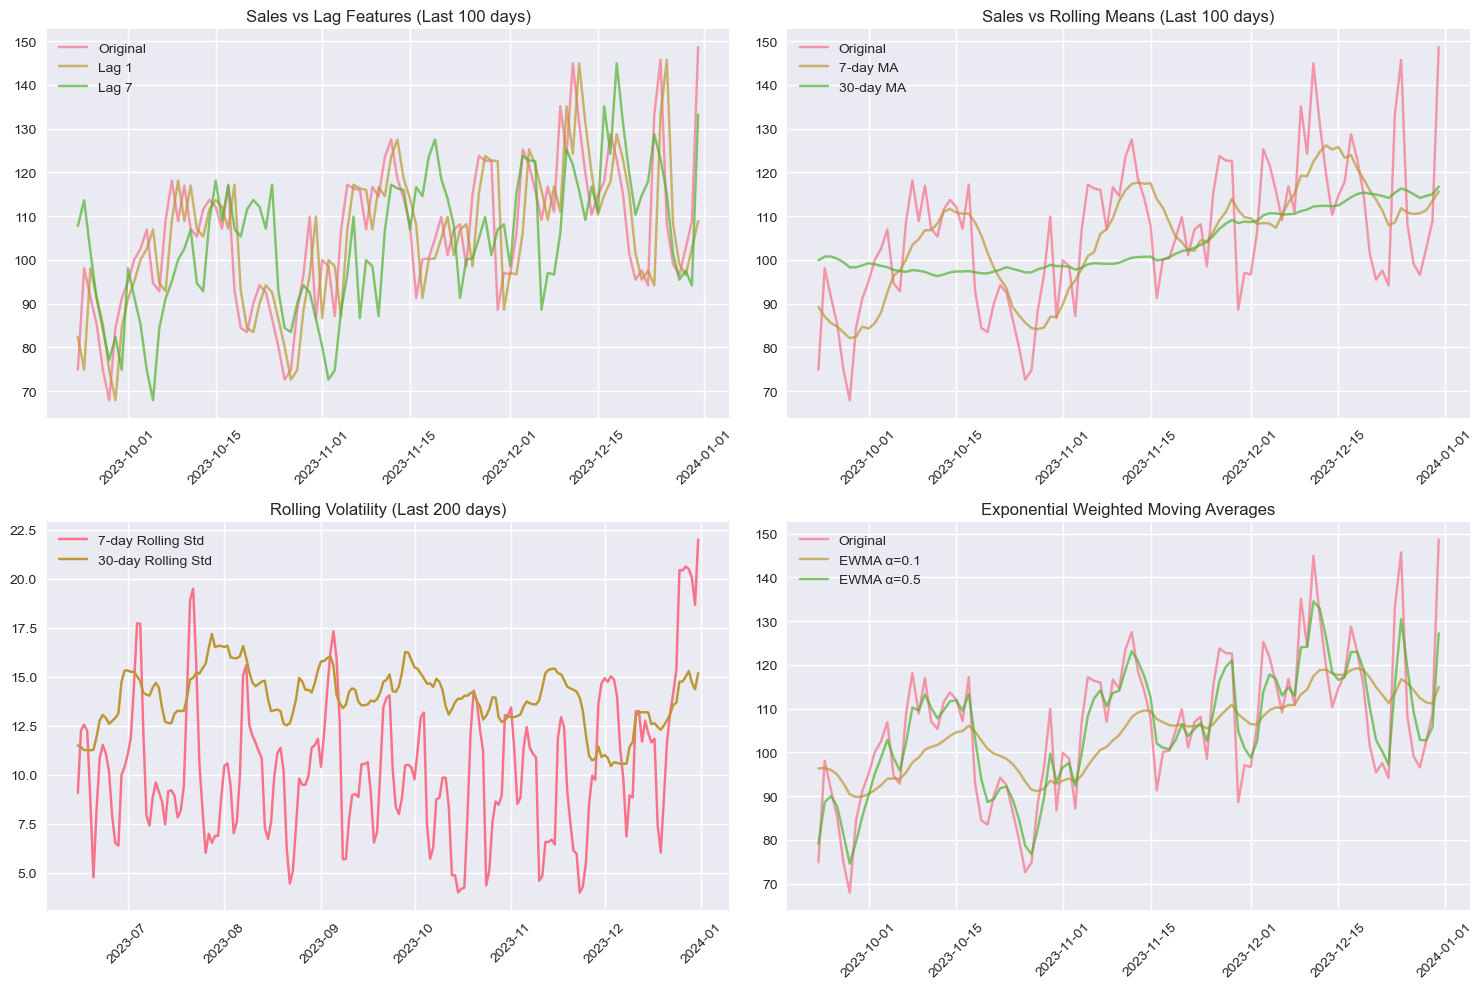

In [42]:
# 2. LAG FEATURES AND ROLLING STATISTICS

# Sort by date to ensure proper ordering
df_ts = df_ts.sort_values('date').reset_index(drop=True)

# Simple lag features
for lag in [1, 2, 3, 7, 14, 30]:
    df_ts[f'sales_lag_{lag}'] = df_ts['sales'].shift(lag)

# Rolling window statistics
windows = [7, 14, 30]
for window in windows:
    df_ts[f'sales_rolling_mean_{window}'] = df_ts['sales'].rolling(window=window).mean()
    df_ts[f'sales_rolling_std_{window}'] = df_ts['sales'].rolling(window=window).std()
    df_ts[f'sales_rolling_min_{window}'] = df_ts['sales'].rolling(window=window).min()
    df_ts[f'sales_rolling_max_{window}'] = df_ts['sales'].rolling(window=window).max()
    df_ts[f'sales_rolling_median_{window}'] = df_ts['sales'].rolling(window=window).median()

# Exponential weighted moving averages
for alpha in [0.1, 0.3, 0.5]:
    df_ts[f'sales_ewm_alpha_{alpha}'] = df_ts['sales'].ewm(alpha=alpha).mean()

# Rolling correlations with external factors
df_ts['sales_temp_corr_30'] = df_ts['sales'].rolling(window=30).corr(df_ts['temperature'])

print("Lag and Rolling Features Created:")
lag_features = [col for col in df_ts.columns if 'lag_' in col or 'rolling_' in col or 'ewm_' in col or 'corr_' in col]
print(f"Number of lag/rolling features: {len(lag_features)}")

# Visualize some lag and rolling features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Original vs lag features
axes[0, 0].plot(df_ts['date'][-100:], df_ts['sales'][-100:], label='Original', alpha=0.7)
axes[0, 0].plot(df_ts['date'][-100:], df_ts['sales_lag_1'][-100:], label='Lag 1', alpha=0.7)
axes[0, 0].plot(df_ts['date'][-100:], df_ts['sales_lag_7'][-100:], label='Lag 7', alpha=0.7)
axes[0, 0].set_title('Sales vs Lag Features (Last 100 days)')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# Rolling means
axes[0, 1].plot(df_ts['date'][-100:], df_ts['sales'][-100:], label='Original', alpha=0.7)
axes[0, 1].plot(df_ts['date'][-100:], df_ts['sales_rolling_mean_7'][-100:], label='7-day MA', alpha=0.7)
axes[0, 1].plot(df_ts['date'][-100:], df_ts['sales_rolling_mean_30'][-100:], label='30-day MA', alpha=0.7)
axes[0, 1].set_title('Sales vs Rolling Means (Last 100 days)')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)

# Rolling volatility
axes[1, 0].plot(df_ts['date'][-200:], df_ts['sales_rolling_std_7'][-200:], label='7-day Rolling Std')
axes[1, 0].plot(df_ts['date'][-200:], df_ts['sales_rolling_std_30'][-200:], label='30-day Rolling Std')
axes[1, 0].set_title('Rolling Volatility (Last 200 days)')
axes[1, 0].legend()
axes[1, 0].tick_params(axis='x', rotation=45)

# Exponential weighted moving averages
axes[1, 1].plot(df_ts['date'][-100:], df_ts['sales'][-100:], label='Original', alpha=0.7)
axes[1, 1].plot(df_ts['date'][-100:], df_ts['sales_ewm_alpha_0.1'][-100:], label='EWMA α=0.1', alpha=0.7)
axes[1, 1].plot(df_ts['date'][-100:], df_ts['sales_ewm_alpha_0.5'][-100:], label='EWMA α=0.5', alpha=0.7)
axes[1, 1].set_title('Exponential Weighted Moving Averages')
axes[1, 1].legend()
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Change and Trend Features Created:
Number of change/trend features: 19


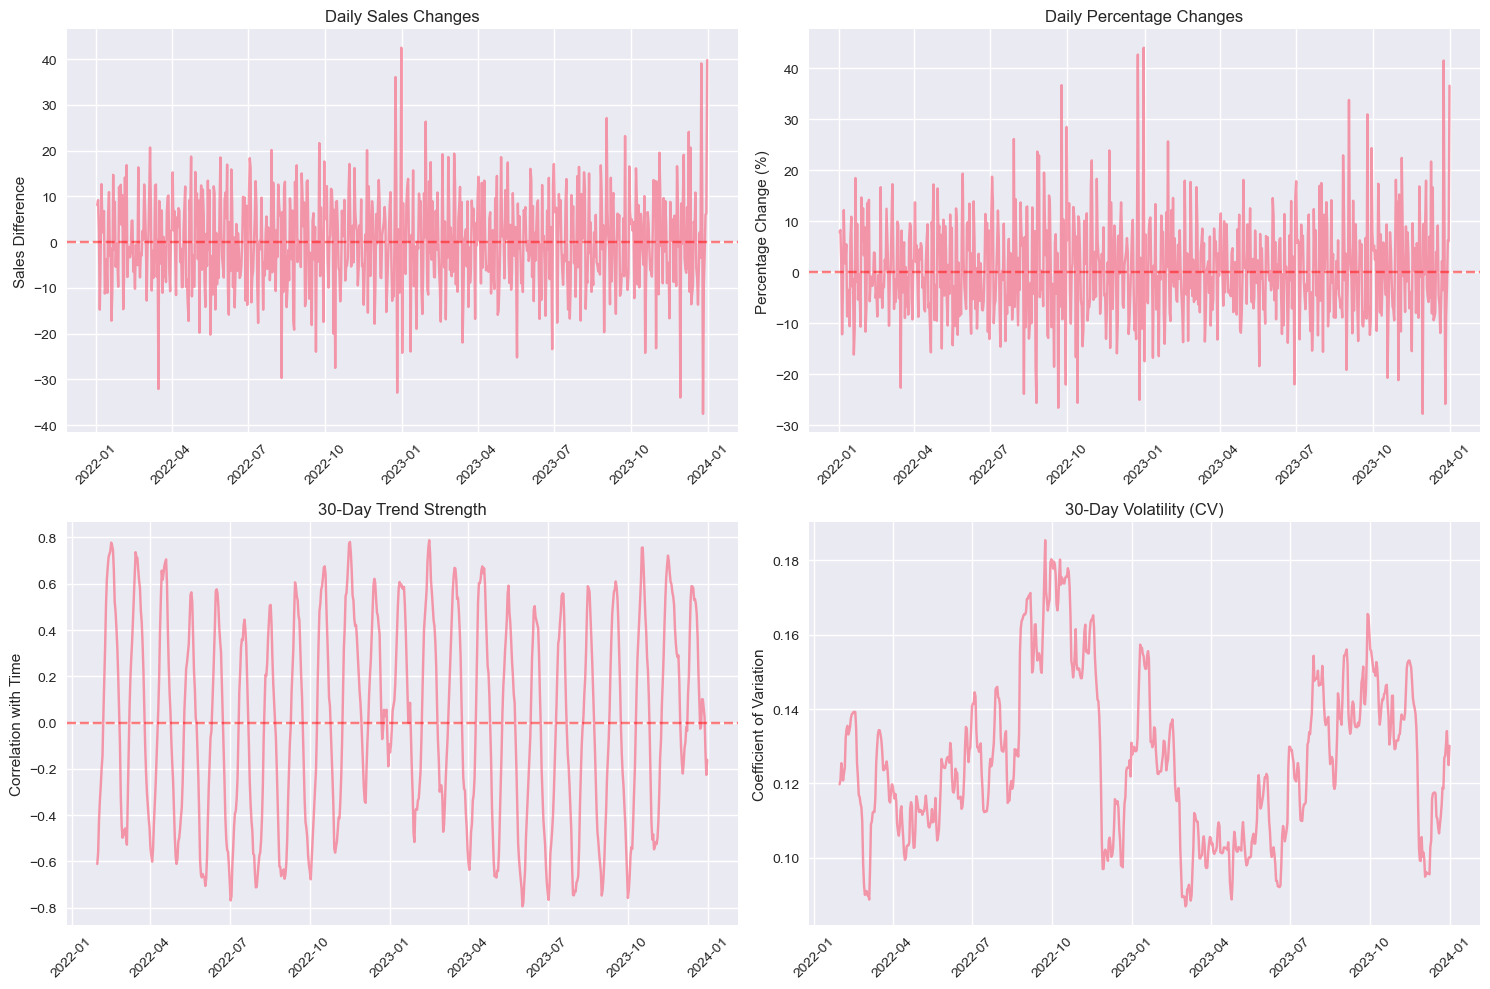

In [44]:
# 3. CHANGE AND TREND FEATURES

# First and second order differences
df_ts['sales_diff_1'] = df_ts['sales'].diff(1)
df_ts['sales_diff_2'] = df_ts['sales'].diff(2)
df_ts['sales_diff_7'] = df_ts['sales'].diff(7)  # Week-over-week change

# Percentage changes
df_ts['sales_pct_change_1'] = df_ts['sales'].pct_change(1)
df_ts['sales_pct_change_7'] = df_ts['sales'].pct_change(7)
df_ts['sales_pct_change_30'] = df_ts['sales'].pct_change(30)

# Trend indicators over rolling windows
for window in [7, 14, 30]:
    # Is the trend increasing?
    df_ts[f'trend_increasing_{window}'] = (df_ts[f'sales_rolling_mean_{window}'] > 
                                         df_ts[f'sales_rolling_mean_{window}'].shift(1)).astype(int)
    
    # Trend strength (correlation with time within window)
    def rolling_trend_strength(series, window):
        def trend_corr(x):
            if len(x) < window:
                return np.nan
            time_index = np.arange(len(x))
            return np.corrcoef(time_index, x)[0, 1]
        return series.rolling(window=window).apply(trend_corr)
    
    df_ts[f'trend_strength_{window}'] = rolling_trend_strength(df_ts['sales'], window)

# Volatility indicators
for window in [7, 14, 30]:
    df_ts[f'volatility_{window}'] = df_ts['sales'].rolling(window=window).std() / df_ts['sales'].rolling(window=window).mean()

# Momentum indicators
df_ts['momentum_7'] = df_ts['sales'] - df_ts['sales_lag_7']
df_ts['momentum_30'] = df_ts['sales'] - df_ts['sales_lag_30']

# Rate of change
df_ts['roc_7'] = (df_ts['sales'] - df_ts['sales_lag_7']) / df_ts['sales_lag_7'] * 100
df_ts['roc_30'] = (df_ts['sales'] - df_ts['sales_lag_30']) / df_ts['sales_lag_30'] * 100

print("Change and Trend Features Created:")
change_features = [col for col in df_ts.columns if any(x in col for x in ['diff_', 'pct_change_', 'trend_', 'volatility_', 'momentum_', 'roc_'])]
print(f"Number of change/trend features: {len(change_features)}")

# Visualize change and trend features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Price changes
axes[0, 0].plot(df_ts['date'], df_ts['sales_diff_1'], alpha=0.7)
axes[0, 0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0, 0].set_title('Daily Sales Changes')
axes[0, 0].set_ylabel('Sales Difference')
axes[0, 0].tick_params(axis='x', rotation=45)

# Percentage changes
axes[0, 1].plot(df_ts['date'], df_ts['sales_pct_change_1'] * 100, alpha=0.7)
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0, 1].set_title('Daily Percentage Changes')
axes[0, 1].set_ylabel('Percentage Change (%)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Trend strength
axes[1, 0].plot(df_ts['date'], df_ts['trend_strength_30'], alpha=0.7)
axes[1, 0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1, 0].set_title('30-Day Trend Strength')
axes[1, 0].set_ylabel('Correlation with Time')
axes[1, 0].tick_params(axis='x', rotation=45)

# Volatility
axes[1, 1].plot(df_ts['date'], df_ts['volatility_30'], alpha=0.7)
axes[1, 1].set_title('30-Day Volatility (CV)')
axes[1, 1].set_ylabel('Coefficient of Variation')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Dataset 3: Text Feature Engineering

In [47]:
# Create a synthetic text dataset (e.g., product reviews)
np.random.seed(42)

# Sample product reviews with different sentiments
positive_words = ['excellent', 'amazing', 'great', 'fantastic', 'wonderful', 'perfect', 'outstanding', 'superb', 'brilliant', 'awesome']
negative_words = ['terrible', 'awful', 'horrible', 'bad', 'poor', 'disappointing', 'worst', 'useless', 'defective', 'broken']
neutral_words = ['okay', 'average', 'decent', 'fine', 'acceptable', 'reasonable', 'adequate', 'normal', 'standard', 'typical']
product_words = ['product', 'item', 'device', 'gadget', 'tool', 'equipment', 'machine', 'appliance', 'software', 'service']
quality_words = ['quality', 'performance', 'durability', 'design', 'functionality', 'features', 'value', 'price', 'shipping', 'packaging']

def generate_review(sentiment, length_category):
    if sentiment == 'positive':
        sentiment_words = positive_words
        rating = np.random.choice([4, 5], p=[0.3, 0.7])
    elif sentiment == 'negative':
        sentiment_words = negative_words
        rating = np.random.choice([1, 2], p=[0.6, 0.4])
    else:  # neutral
        sentiment_words = neutral_words
        rating = 3
    
    # Determine review length
    if length_category == 'short':
        n_sentences = np.random.randint(1, 3)
        words_per_sentence = np.random.randint(5, 10)
    elif length_category == 'medium':
        n_sentences = np.random.randint(3, 6)
        words_per_sentence = np.random.randint(8, 15)
    else:  # long
        n_sentences = np.random.randint(6, 10)
        words_per_sentence = np.random.randint(12, 20)
    
    review_text = ""
    for _ in range(n_sentences):
        sentence = []
        sentence.append("The")
        sentence.append(np.random.choice(product_words))
        sentence.append("is")
        sentence.append(np.random.choice(sentiment_words))
        
        # Add quality aspects
        if np.random.random() > 0.5:
            sentence.extend(["and", "the", np.random.choice(quality_words), "is"])
            sentence.append(np.random.choice(sentiment_words))
        
        # Add filler words to reach desired length
        filler_words = ['really', 'very', 'quite', 'somewhat', 'definitely', 'absolutely', 'certainly', 'particularly']
        while len(sentence) < words_per_sentence:
            sentence.insert(-1, np.random.choice(filler_words))
        
        review_text += " ".join(sentence) + ". "
    
    return review_text.strip(), rating

# Generate dataset
n_reviews = 1000
reviews_data = []

sentiments = ['positive', 'negative', 'neutral']
lengths = ['short', 'medium', 'long']

for _ in range(n_reviews):
    sentiment = np.random.choice(sentiments, p=[0.5, 0.3, 0.2])
    length = np.random.choice(lengths, p=[0.3, 0.5, 0.2])
    text, rating = generate_review(sentiment, length)
    
    reviews_data.append({
        'review_text': text,
        'rating': rating,
        'true_sentiment': sentiment
    })

df_text = pd.DataFrame(reviews_data)

print(f"Text Dataset Shape: {df_text.shape}")
print("\nRating Distribution:")
print(df_text['rating'].value_counts().sort_index())
print("\nSentiment Distribution:")
print(df_text['true_sentiment'].value_counts())
print("\nSample Reviews:")
for i in range(3):
    print(f"\nReview {i+1} (Rating: {df_text.iloc[i]['rating']}):")
    print(df_text.iloc[i]['review_text'])

Text Dataset Shape: (1000, 3)

Rating Distribution:
rating
1    202
2    116
3    195
4    146
5    341
Name: count, dtype: int64

Sentiment Distribution:
true_sentiment
positive    487
negative    318
neutral     195
Name: count, dtype: int64

Sample Reviews:

Review 1 (Rating: 5):
The machine is quite quite particularly definitely somewhat particularly particularly quite absolutely definitely very particularly awesome. The equipment is definitely really somewhat very absolutely definitely somewhat really really quite quite certainly amazing. The service is somewhat particularly really quite definitely quite certainly definitely really certainly very somewhat great. The software is very definitely very somewhat somewhat certainly somewhat certainly somewhat definitely particularly certainly amazing. The device is particularly somewhat very absolutely absolutely absolutely very somewhat absolutely definitely certainly very excellent. The service is somewhat absolutely certainly particu

Basic Text Features Extracted:
        char_count   word_count  sentence_count  avg_word_length  \
count  1000.000000  1000.000000     1000.000000      1000.000000   
mean    354.193000    48.038000        3.872000         5.972342   
std     307.677726    38.778271        2.255372         0.781012   
min      26.000000     5.000000        1.000000         3.333333   
25%     106.000000    17.000000        2.000000         5.454545   
50%     276.500000    39.000000        4.000000         6.090097   
75%     462.500000    60.000000        5.000000         6.558269   
max    1419.000000   171.000000        9.000000         8.000000   

       avg_sentence_length  unique_word_ratio  exclamation_count  \
count          1000.000000        1000.000000             1000.0   
mean             11.004600           0.511834                0.0   
std               3.117907           0.215307                0.0   
min               5.000000           0.152047                0.0   
25%             

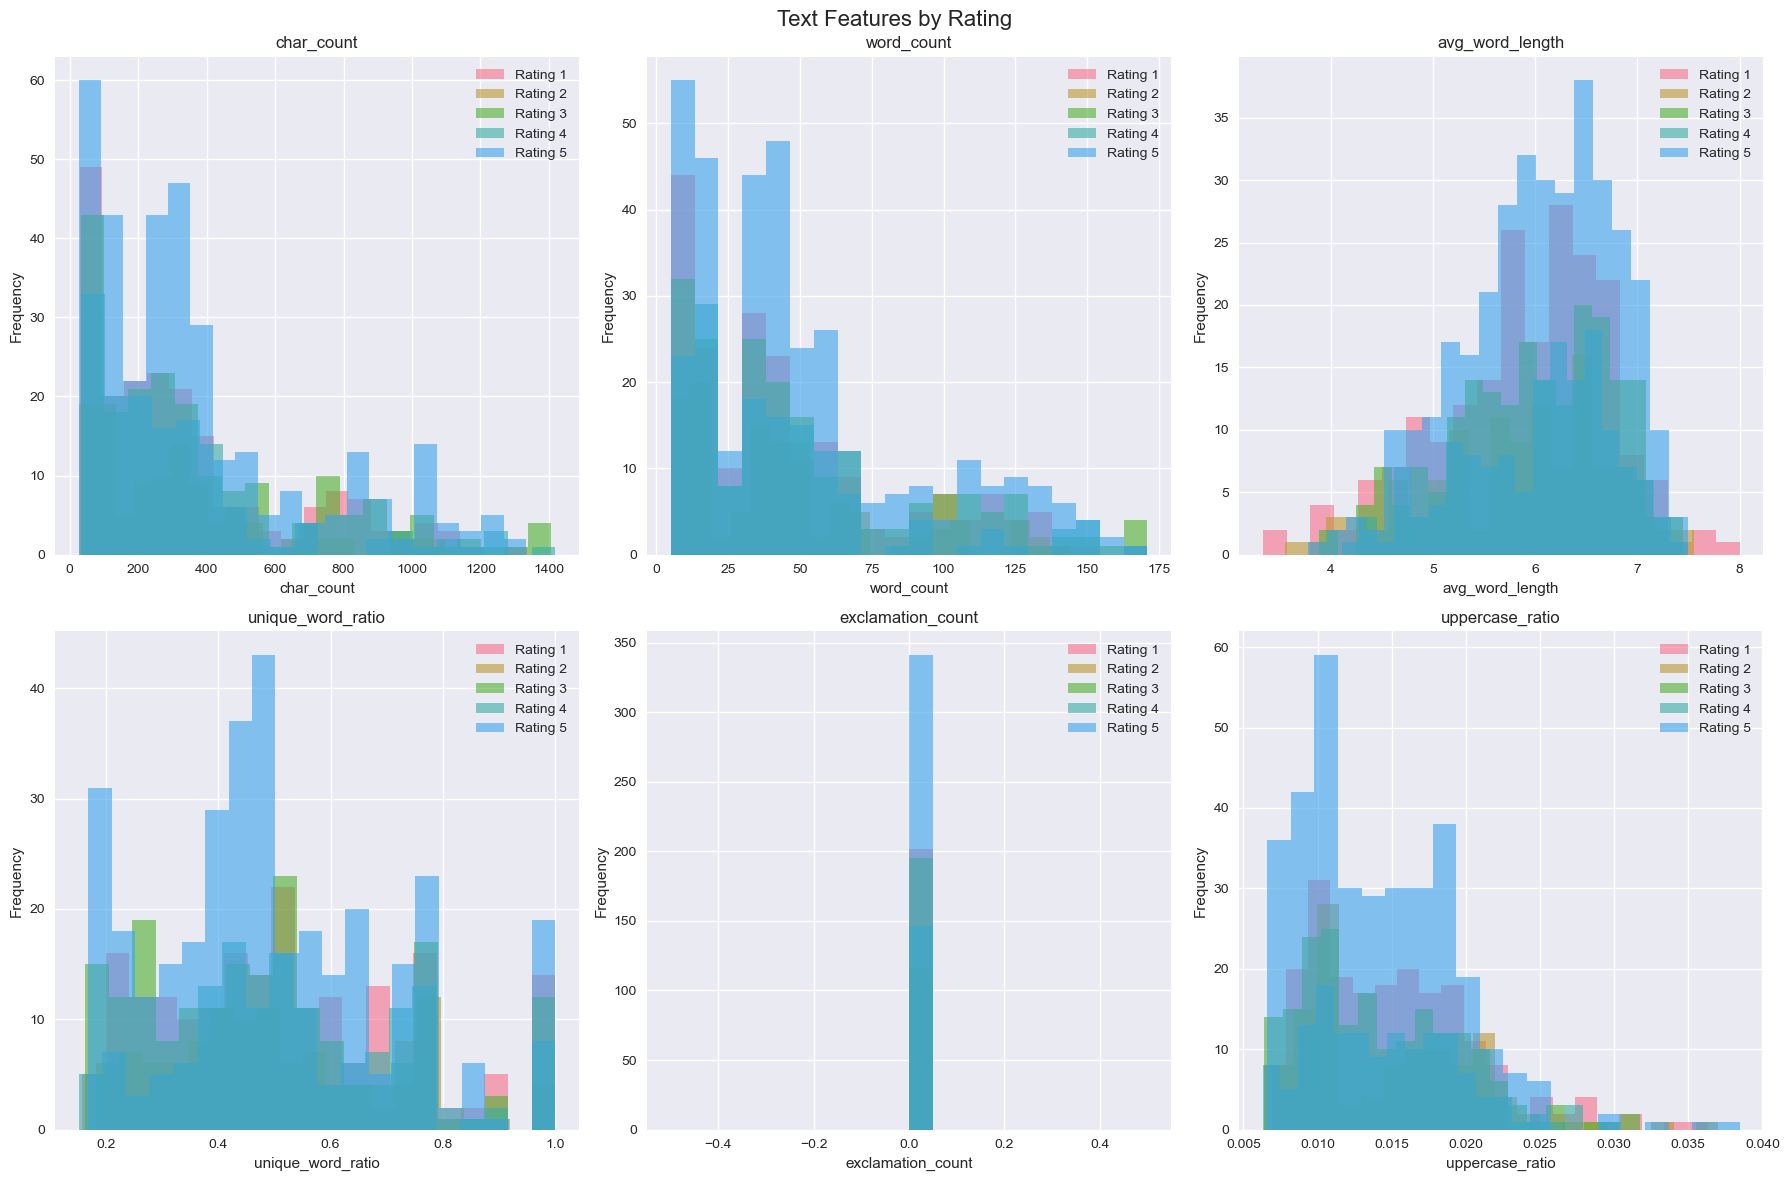


Correlation with Rating:
char_count: 0.038
word_count: 0.031
avg_word_length: 0.087
unique_word_ratio: -0.020
exclamation_count: nan
uppercase_ratio: -0.069


In [49]:
# TEXT PREPROCESSING AND BASIC FEATURES

import re
import string
from collections import Counter

def clean_text(text):
    """Basic text cleaning function"""
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

def extract_basic_text_features(text):
    """Extract basic statistical features from text"""
    # Original text features
    char_count = len(text)
    word_count = len(text.split())
    sentence_count = text.count('.') + text.count('!') + text.count('?')
    if sentence_count == 0:
        sentence_count = 1  # Avoid division by zero
    
    # Clean text for further analysis
    clean = clean_text(text)
    clean_words = clean.split()
    
    # Advanced features
    avg_word_length = np.mean([len(word) for word in clean_words]) if clean_words else 0
    avg_sentence_length = word_count / sentence_count
    unique_word_ratio = len(set(clean_words)) / len(clean_words) if clean_words else 0
    
    # Punctuation features
    exclamation_count = text.count('!')
    question_count = text.count('?')
    uppercase_ratio = sum(1 for c in text if c.isupper()) / len(text) if text else 0
    
    return {
        'char_count': char_count,
        'word_count': word_count,
        'sentence_count': sentence_count,
        'avg_word_length': avg_word_length,
        'avg_sentence_length': avg_sentence_length,
        'unique_word_ratio': unique_word_ratio,
        'exclamation_count': exclamation_count,
        'question_count': question_count,
        'uppercase_ratio': uppercase_ratio
    }

# Extract basic text features
text_features = []
for text in df_text['review_text']:
    features = extract_basic_text_features(text)
    text_features.append(features)

text_features_df = pd.DataFrame(text_features)

# Add to main dataframe
for col in text_features_df.columns:
    df_text[col] = text_features_df[col]

print("Basic Text Features Extracted:")
print(text_features_df.describe())

# Visualize text features by rating
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Text Features by Rating', fontsize=16)

features_to_plot = ['char_count', 'word_count', 'avg_word_length', 'unique_word_ratio', 'exclamation_count', 'uppercase_ratio']

for i, feature in enumerate(features_to_plot):
    row, col = i // 3, i % 3
    for rating in sorted(df_text['rating'].unique()):
        subset = df_text[df_text['rating'] == rating][feature]
        axes[row, col].hist(subset, alpha=0.6, label=f'Rating {rating}', bins=20)
    axes[row, col].set_title(f'{feature}')
    axes[row, col].legend()
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation with rating
print("\nCorrelation with Rating:")
for feature in features_to_plot:
    corr = df_text[feature].corr(df_text['rating'])
    print(f"{feature}: {corr:.3f}")

Bag of Words Features: (1000, 57)
Top BoW features: ['absolutely' 'acceptable' 'adequate' 'amazing' 'appliance' 'average'
 'awesome' 'awful' 'bad' 'brilliant' 'broken' 'certainly' 'decent'
 'defective' 'definitely' 'design' 'device' 'disappointing' 'durability'
 'equipment']
TF-IDF Features: (1000, 100)
Top TF-IDF features: ['absolutely' 'absolutely absolutely' 'absolutely certainly'
 'absolutely definitely' 'absolutely particularly' 'absolutely quite'
 'absolutely really' 'absolutely somewhat' 'amazing' 'appliance' 'average'
 'awesome' 'awful' 'bad' 'brilliant' 'broken' 'certainly'
 'certainly absolutely' 'certainly certainly' 'certainly definitely']
Bigram Features: (1000, 50)
Top Bigram features: ['absolutely absolutely' 'absolutely certainly' 'absolutely definitely'
 'absolutely particularly' 'absolutely perfect' 'absolutely quite'
 'absolutely really' 'absolutely somewhat' 'certainly absolutely'
 'certainly certainly' 'certainly definitely' 'certainly particularly'
 'certainly qui

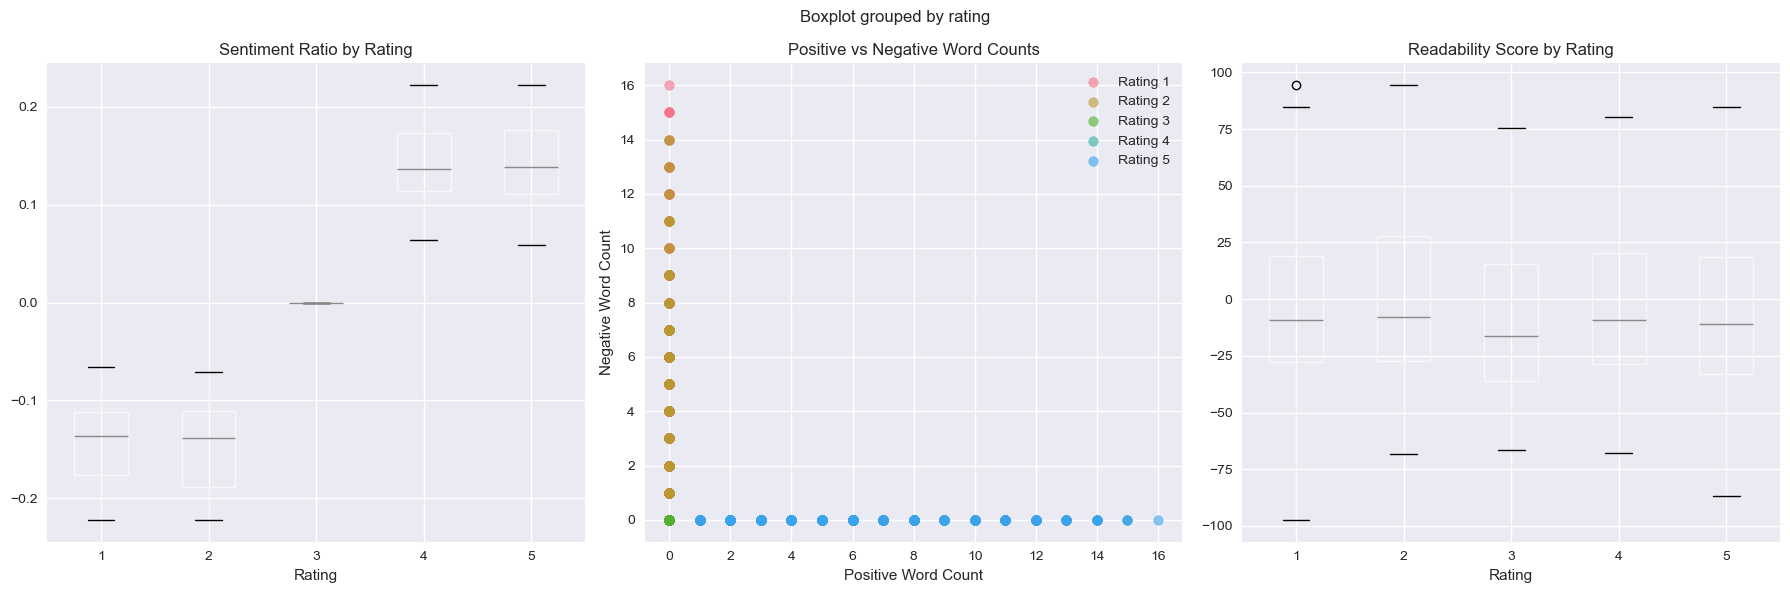

In [51]:
# ADVANCED TEXT FEATURE EXTRACTION

# 1. BAG OF WORDS AND TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Clean texts for vectorization
df_text['clean_text'] = df_text['review_text'].apply(clean_text)

# Bag of Words
bow_vectorizer = CountVectorizer(max_features=100, stop_words='english', ngram_range=(1, 1))
bow_features = bow_vectorizer.fit_transform(df_text['clean_text'])
bow_feature_names = bow_vectorizer.get_feature_names_out()

print(f"Bag of Words Features: {bow_features.shape}")
print("Top BoW features:", bow_feature_names[:20])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english', ngram_range=(1, 2))
tfidf_features = tfidf_vectorizer.fit_transform(df_text['clean_text'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

print(f"TF-IDF Features: {tfidf_features.shape}")
print("Top TF-IDF features:", tfidf_feature_names[:20])

# 2. N-GRAMS
# Bigrams
bigram_vectorizer = CountVectorizer(max_features=50, stop_words='english', ngram_range=(2, 2))
bigram_features = bigram_vectorizer.fit_transform(df_text['clean_text'])
bigram_feature_names = bigram_vectorizer.get_feature_names_out()

print(f"Bigram Features: {bigram_features.shape}")
print("Top Bigram features:", bigram_feature_names[:15])

# 3. SENTIMENT ANALYSIS FEATURES
# Simple sentiment analysis using word lists
positive_sentiment_words = set(['excellent', 'amazing', 'great', 'fantastic', 'wonderful', 'perfect', 'outstanding', 'superb', 'brilliant', 'awesome', 'good', 'nice', 'beautiful', 'love', 'like'])
negative_sentiment_words = set(['terrible', 'awful', 'horrible', 'bad', 'poor', 'disappointing', 'worst', 'useless', 'defective', 'broken', 'hate', 'dislike', 'ugly', 'disgusting'])

def extract_sentiment_features(text):
    words = clean_text(text).split()
    positive_count = sum(1 for word in words if word in positive_sentiment_words)
    negative_count = sum(1 for word in words if word in negative_sentiment_words)
    sentiment_ratio = (positive_count - negative_count) / len(words) if words else 0
    
    return positive_count, negative_count, sentiment_ratio

sentiment_features = df_text['review_text'].apply(extract_sentiment_features)
df_text['positive_word_count'] = [x[0] for x in sentiment_features]
df_text['negative_word_count'] = [x[1] for x in sentiment_features]
df_text['sentiment_ratio'] = [x[2] for x in sentiment_features]

# 4. LINGUISTIC FEATURES
def extract_linguistic_features(text):
    """Extract linguistic complexity features"""
    words = clean_text(text).split()
    
    # Lexical diversity (Type-Token Ratio)
    ttr = len(set(words)) / len(words) if words else 0
    
    # Average syllables per word (simplified estimation)
    def estimate_syllables(word):
        vowels = 'aeiouy'
        syllables = 0
        prev_was_vowel = False
        for char in word.lower():
            is_vowel = char in vowels
            if is_vowel and not prev_was_vowel:
                syllables += 1
            prev_was_vowel = is_vowel
        return max(1, syllables)  # Every word has at least 1 syllable
    
    avg_syllables = np.mean([estimate_syllables(word) for word in words]) if words else 0
    
    # Readability (simplified Flesch Reading Ease)
    if len(words) > 0 and text.count('.') > 0:
        avg_sentence_length = len(words) / text.count('.')
        flesch_score = 206.835 - (1.015 * avg_sentence_length) - (84.6 * avg_syllables)
    else:
        flesch_score = 0
    
    return ttr, avg_syllables, flesch_score

linguistic_features = df_text['review_text'].apply(extract_linguistic_features)
df_text['lexical_diversity'] = [x[0] for x in linguistic_features]
df_text['avg_syllables'] = [x[1] for x in linguistic_features]
df_text['readability_score'] = [x[2] for x in linguistic_features]

print("\nAdvanced Text Features Summary:")
advanced_features = ['positive_word_count', 'negative_word_count', 'sentiment_ratio', 
                    'lexical_diversity', 'avg_syllables', 'readability_score']
print(df_text[advanced_features].describe())

# Visualize sentiment features vs rating
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Sentiment ratio by rating
df_text.boxplot(column='sentiment_ratio', by='rating', ax=axes[0])
axes[0].set_title('Sentiment Ratio by Rating')
axes[0].set_xlabel('Rating')

# Positive vs negative word counts
for rating in sorted(df_text['rating'].unique()):
    subset = df_text[df_text['rating'] == rating]
    axes[1].scatter(subset['positive_word_count'], subset['negative_word_count'], 
                   label=f'Rating {rating}', alpha=0.6)
axes[1].set_xlabel('Positive Word Count')
axes[1].set_ylabel('Negative Word Count')
axes[1].set_title('Positive vs Negative Word Counts')
axes[1].legend()

# Readability score by rating
df_text.boxplot(column='readability_score', by='rating', ax=axes[2])
axes[2].set_title('Readability Score by Rating')
axes[2].set_xlabel('Rating')

plt.tight_layout()
plt.show()

Feature Matrix Shapes:
Basic features: (1000, 15)
BoW features: (1000, 57)
TF-IDF features: (1000, 100)
Combined features: (1000, 115)

Selected Basic Features (top 8):
exclamation_count: 0.030
uppercase_ratio: 0.021
positive_word_count: 0.716
negative_word_count: 0.607
sentiment_ratio: 1.018
lexical_diversity: 0.000
avg_syllables: 0.000
readability_score: 0.012

Selected TF-IDF Features (top 20):
amazing: 0.224
average: 0.177
awesome: 0.203
awful: 0.137
bad: 0.178
brilliant: 0.151
broken: 0.178
defective: 0.168
disappointing: 0.137
excellent: 0.146
Basic Only: R² = 0.904 (±0.010), Features: 15
BoW Only: R² = 0.909 (±0.007), Features: 57
TF-IDF Only: R² = 0.907 (±0.007), Features: 100
Basic + TF-IDF: R² = 0.913 (±0.008), Features: 115
Selected Basic: R² = 0.905 (±0.010), Features: 8
Selected TF-IDF: R² = 0.894 (±0.008), Features: 20
Selected Combined: R² = 0.912 (±0.008), Features: 28


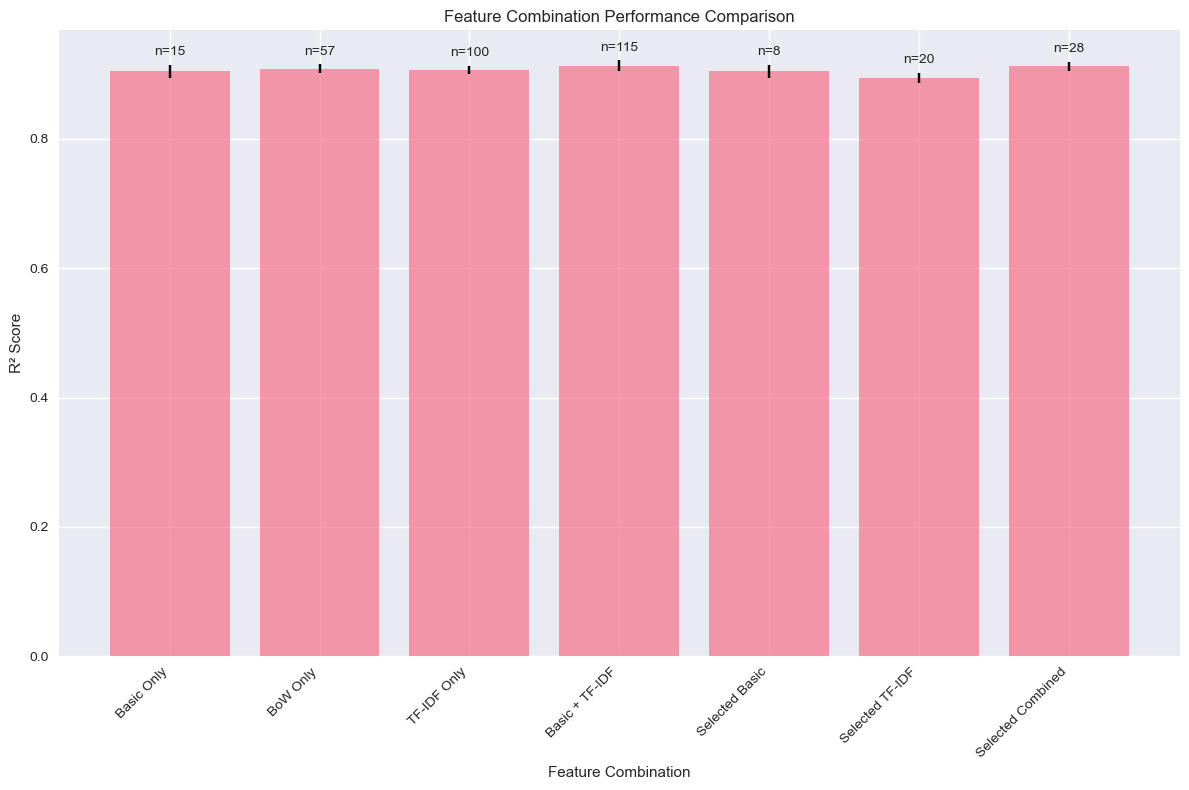

In [55]:
# 5. FEATURE SELECTION AND COMBINATION

# Combine all features for comprehensive analysis
# Numerical features from basic text analysis
basic_text_features = ['char_count', 'word_count', 'sentence_count', 'avg_word_length', 
                      'avg_sentence_length', 'unique_word_ratio', 'exclamation_count', 
                      'question_count', 'uppercase_ratio']

# Advanced text features
advanced_text_features = ['positive_word_count', 'negative_word_count', 'sentiment_ratio', 
                         'lexical_diversity', 'avg_syllables', 'readability_score']

# Convert sparse matrices to dense for combination
bow_dense = bow_features.toarray()
tfidf_dense = tfidf_features.toarray()
bigram_dense = bigram_features.toarray()

# Create feature matrices
X_basic = df_text[basic_text_features + advanced_text_features].values
X_bow = bow_dense
X_tfidf = tfidf_dense
X_combined = np.hstack([X_basic, X_tfidf])  # Combine basic features with TF-IDF

y = df_text['rating'].values

print("Feature Matrix Shapes:")
print(f"Basic features: {X_basic.shape}")
print(f"BoW features: {X_bow.shape}")
print(f"TF-IDF features: {X_tfidf.shape}")
print(f"Combined features: {X_combined.shape}")

# Feature selection using mutual information
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# For basic features
selector_basic = SelectKBest(mutual_info_regression, k=8)
X_basic_selected = selector_basic.fit_transform(X_basic, y)

selected_indices = selector_basic.get_support(indices=True)
all_text_features = basic_text_features + advanced_text_features
selected_features = [all_text_features[i] for i in selected_indices]

print(f"\nSelected Basic Features (top 8):")
feature_scores = selector_basic.scores_
for i, feature in enumerate(selected_features):
    print(f"{feature}: {feature_scores[selected_indices[i]]:.3f}")

# For TF-IDF features
selector_tfidf = SelectKBest(mutual_info_regression, k=20)
X_tfidf_selected = selector_tfidf.fit_transform(X_tfidf, y)

selected_tfidf_indices = selector_tfidf.get_support(indices=True)
selected_tfidf_features = [tfidf_feature_names[i] for i in selected_tfidf_indices]

print(f"\nSelected TF-IDF Features (top 20):")
tfidf_scores = selector_tfidf.scores_
for i, feature in enumerate(selected_tfidf_features[:10]):  # Show top 10
    print(f"{feature}: {tfidf_scores[selected_tfidf_indices[i]]:.3f}")

# Evaluate different feature combinations
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Test different feature combinations
feature_combinations = {
    'Basic Only': X_basic,
    'BoW Only': X_bow,
    'TF-IDF Only': X_tfidf,
    'Basic + TF-IDF': X_combined,
    'Selected Basic': X_basic_selected,
    'Selected TF-IDF': X_tfidf_selected,
    'Selected Combined': np.hstack([X_basic_selected, X_tfidf_selected])
}

# Evaluate each combination
results = {}
for name, X in feature_combinations.items():
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Cross-validation
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='r2')
    
    results[name] = {
        'mean_r2': scores.mean(),
        'std_r2': scores.std(),
        'n_features': X.shape[1]
    }
    
    print(f"{name}: R² = {scores.mean():.3f} (±{scores.std():.3f}), Features: {X.shape[1]}")

# Visualize results
feature_names = list(results.keys())
r2_scores = [results[name]['mean_r2'] for name in feature_names]
r2_stds = [results[name]['std_r2'] for name in feature_names]

plt.figure(figsize=(12, 8))
bars = plt.bar(feature_names, r2_scores, yerr=r2_stds, capsize=5, alpha=0.7)
plt.title('Feature Combination Performance Comparison')
plt.ylabel('R² Score')
plt.xlabel('Feature Combination')
plt.xticks(rotation=45, ha='right')

# Add feature count annotations
for i, (bar, name) in enumerate(zip(bars, feature_names)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + r2_stds[i] + 0.01,
             f'n={results[name]["n_features"]}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Advanced Feature Engineering Techniques

Polynomial Features: (1000, 10)
New polynomial features: ['word_count avg_word_length' 'word_count sentiment_ratio'
 'word_count lexical_diversity' 'avg_word_length sentiment_ratio'
 'avg_word_length lexical_diversity' 'sentiment_ratio lexical_diversity']

Top 15 Most Important Features:
                   feature  importance
11         sentiment_ratio    0.479042
9      positive_word_count    0.385691
10     negative_word_count    0.060807
50                  device    0.002051
8          uppercase_ratio    0.001934
31               certainly    0.001794
15              absolutely    0.001560
73   particularly somewhat    0.001536
3          avg_word_length    0.001448
65               packaging    0.001327
0               char_count    0.001237
109                   tool    0.001228
54               excellent    0.001202
88                  really    0.001179
62                 machine    0.001141


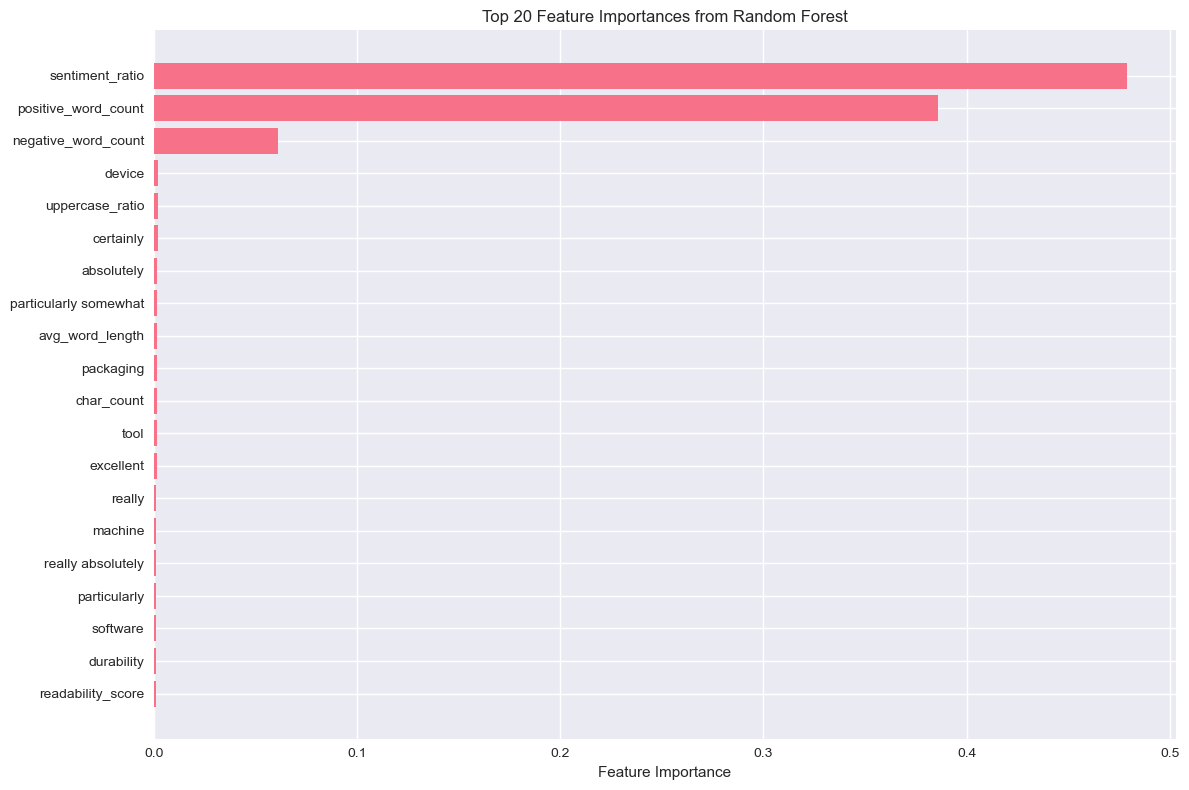

In [58]:
# 6. AUTOMATED FEATURE ENGINEERING

# Polynomial features for numerical data
from sklearn.preprocessing import PolynomialFeatures

# Select subset of basic features for polynomial expansion
poly_base_features = ['word_count', 'avg_word_length', 'sentiment_ratio', 'lexical_diversity']
poly_data = df_text[poly_base_features].values

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(poly_data)
poly_feature_names = poly.get_feature_names_out(poly_base_features)

print(f"Polynomial Features: {poly_features.shape}")
print("New polynomial features:", poly_feature_names[len(poly_base_features):])

# Feature importance from Random Forest
rf_importance = RandomForestRegressor(n_estimators=100, random_state=42)
rf_importance.fit(X_combined, y)

# Get feature names for combined features
combined_feature_names = basic_text_features + advanced_text_features + list(tfidf_feature_names)
feature_importance = rf_importance.feature_importances_

# Sort by importance
importance_df = pd.DataFrame({
    'feature': combined_feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(importance_df.head(15))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = importance_df.head(20)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Domain-Specific Feature Engineering Examples


=== E-COMMERCE / REAL ESTATE FEATURES ===
Real Estate Domain Features:
- distance_to_school
- distance_to_mall
- distance_to_hospital
- livability_score
- space_efficiency
- room_size_ratio
- price_vs_neighborhood_median
- price_percentile_in_neighborhood

=== FINANCIAL / TIME SERIES FEATURES ===
Financial/Technical Features:
- rsi_14
- bb_width
- bb_position
- macd
- macd_signal
- weekly_seasonal_strength
- monthly_seasonal_strength


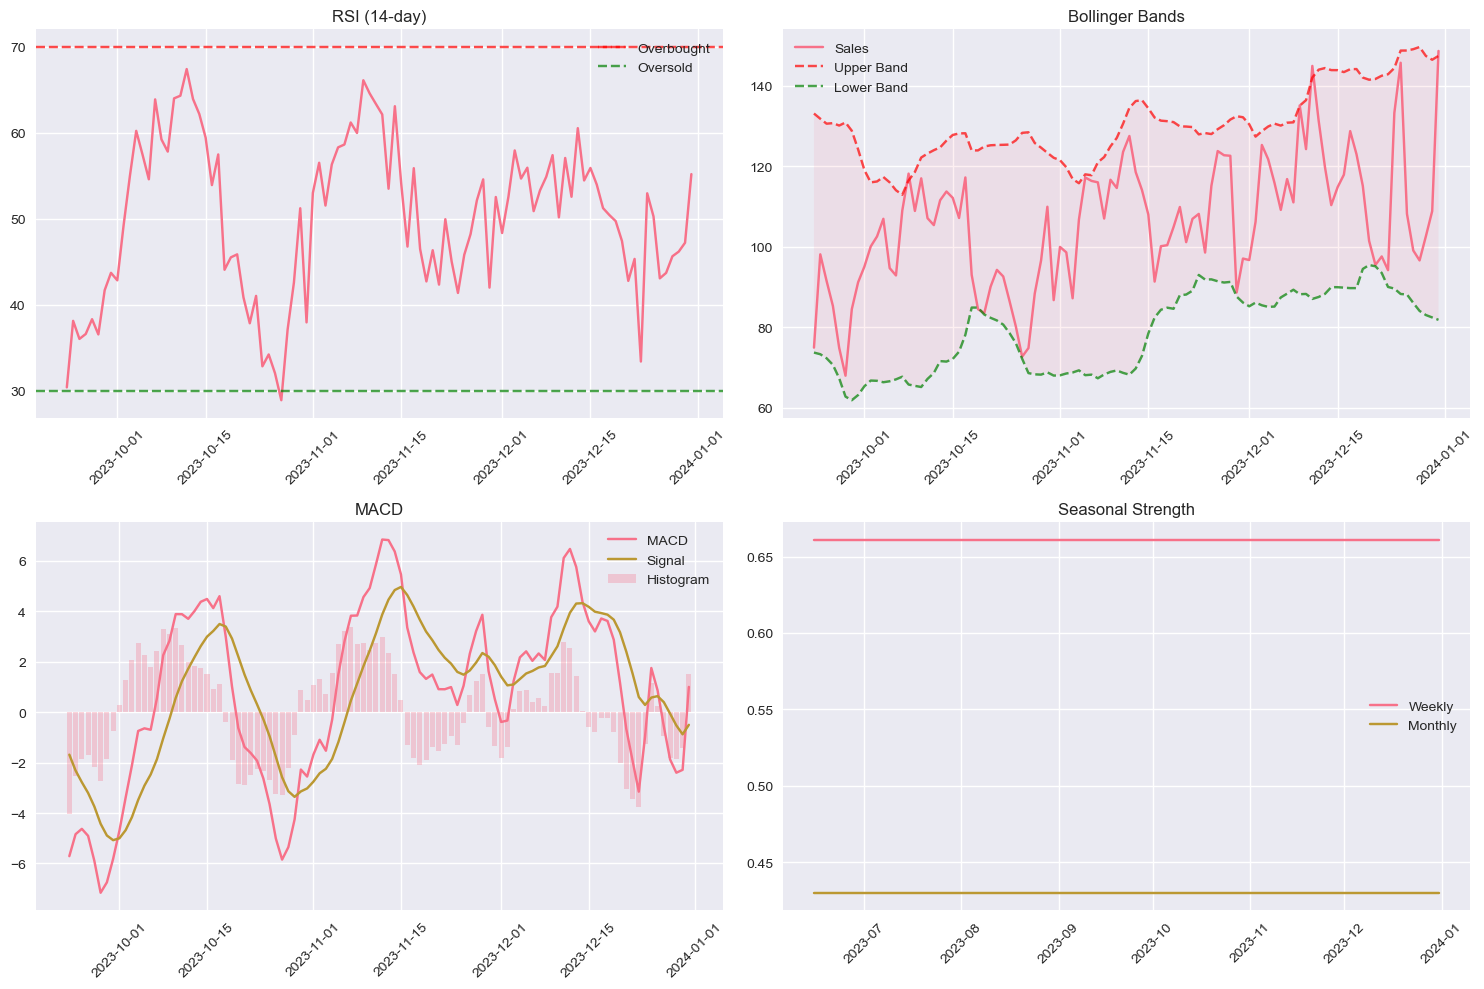

In [62]:
# 7. DOMAIN-SPECIFIC FEATURES FOR DIFFERENT INDUSTRIES

# E-COMMERCE FEATURES (extending our house price example)
# Go back to house dataset and create domain-specific features

print("=== E-COMMERCE / REAL ESTATE FEATURES ===")

# Location-based features
def calculate_distance(lat1, lon1, lat2, lon2):
    """Calculate distance between two points (simplified)"""
    return np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)

# Distance to key amenities (simulated)
df_houses['distance_to_school'] = np.random.gamma(2, 0.5, len(df_houses))
df_houses['distance_to_mall'] = np.random.gamma(1.5, 0.8, len(df_houses))
df_houses['distance_to_hospital'] = np.random.gamma(2.5, 0.3, len(df_houses))

# Composite scores
df_houses['livability_score'] = (
    (1 / (df_houses['distance_to_school'] + 0.1)) * 0.3 +
    (1 / (df_houses['distance_to_mall'] + 0.1)) * 0.2 +
    (1 / (df_houses['distance_to_hospital'] + 0.1)) * 0.5
)

# Efficiency ratios
df_houses['space_efficiency'] = df_houses['living_area'] / df_houses['lot_size']
df_houses['room_size_ratio'] = df_houses['living_area'] / df_houses['total_rooms']

# Price-based features
df_houses['price_vs_neighborhood_median'] = df_houses.groupby('neighborhood')['price'].transform(
    lambda x: (x - x.median()) / x.median()
)

# Market position features
df_houses['price_percentile_in_neighborhood'] = df_houses.groupby('neighborhood')['price'].transform(
    lambda x: x.rank(pct=True)
)

print("Real Estate Domain Features:")
domain_features = ['distance_to_school', 'distance_to_mall', 'distance_to_hospital',
                  'livability_score', 'space_efficiency', 'room_size_ratio',
                  'price_vs_neighborhood_median', 'price_percentile_in_neighborhood']

for feature in domain_features:
    print(f"- {feature}")

# FINANCIAL FEATURES (extending time series example)
print("\n=== FINANCIAL / TIME SERIES FEATURES ===")

# Technical indicators
def calculate_rsi(prices, window=14):
    """Relative Strength Index"""
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_bollinger_bands(prices, window=20, num_std=2):
    """Bollinger Bands"""
    rolling_mean = prices.rolling(window=window).mean()
    rolling_std = prices.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, lower_band

# Apply technical indicators to sales data
df_ts['rsi_14'] = calculate_rsi(df_ts['sales'])
df_ts['bb_upper'], df_ts['bb_lower'] = calculate_bollinger_bands(df_ts['sales'])
df_ts['bb_width'] = df_ts['bb_upper'] - df_ts['bb_lower']
df_ts['bb_position'] = (df_ts['sales'] - df_ts['bb_lower']) / (df_ts['bb_upper'] - df_ts['bb_lower'])

# Moving average convergence divergence (MACD)
ema_12 = df_ts['sales'].ewm(span=12).mean()
ema_26 = df_ts['sales'].ewm(span=26).mean()
df_ts['macd'] = ema_12 - ema_26
df_ts['macd_signal'] = df_ts['macd'].ewm(span=9).mean()
df_ts['macd_histogram'] = df_ts['macd'] - df_ts['macd_signal']

# Seasonality strength
def seasonal_strength(series, period=7):
    """Calculate seasonal strength"""
    seasonal_component = series.rolling(window=period).mean()
    detrended = series - seasonal_component
    seasonal_strength = 1 - (detrended.var() / series.var())
    return seasonal_strength

df_ts['weekly_seasonal_strength'] = seasonal_strength(df_ts['sales'], 7)
df_ts['monthly_seasonal_strength'] = seasonal_strength(df_ts['sales'], 30)

print("Financial/Technical Features:")
financial_features = ['rsi_14', 'bb_width', 'bb_position', 'macd', 'macd_signal', 
                     'weekly_seasonal_strength', 'monthly_seasonal_strength']
for feature in financial_features:
    print(f"- {feature}")

# Visualize financial features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# RSI
axes[0, 0].plot(df_ts['date'][-100:], df_ts['rsi_14'][-100:])
axes[0, 0].axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Overbought')
axes[0, 0].axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Oversold')
axes[0, 0].set_title('RSI (14-day)')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# Bollinger Bands
axes[0, 1].plot(df_ts['date'][-100:], df_ts['sales'][-100:], label='Sales')
axes[0, 1].plot(df_ts['date'][-100:], df_ts['bb_upper'][-100:], 'r--', alpha=0.7, label='Upper Band')
axes[0, 1].plot(df_ts['date'][-100:], df_ts['bb_lower'][-100:], 'g--', alpha=0.7, label='Lower Band')
axes[0, 1].fill_between(df_ts['date'][-100:], df_ts['bb_upper'][-100:], df_ts['bb_lower'][-100:], alpha=0.1)
axes[0, 1].set_title('Bollinger Bands')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)

# MACD
axes[1, 0].plot(df_ts['date'][-100:], df_ts['macd'][-100:], label='MACD')
axes[1, 0].plot(df_ts['date'][-100:], df_ts['macd_signal'][-100:], label='Signal')
axes[1, 0].bar(df_ts['date'][-100:], df_ts['macd_histogram'][-100:], alpha=0.3, label='Histogram')
axes[1, 0].set_title('MACD')
axes[1, 0].legend()
axes[1, 0].tick_params(axis='x', rotation=45)

# Seasonal strength
axes[1, 1].plot(df_ts['date'][-200:], df_ts['weekly_seasonal_strength'][-200:], label='Weekly')
axes[1, 1].plot(df_ts['date'][-200:], df_ts['monthly_seasonal_strength'][-200:], label='Monthly')
axes[1, 1].set_title('Seasonal Strength')
axes[1, 1].legend()
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Feature Engineering Best Practices and Validation

In [65]:
# 8. FEATURE ENGINEERING VALIDATION AND BEST PRACTICES

print("=== FEATURE ENGINEERING VALIDATION ===")

# Create a comprehensive feature validation framework
class FeatureValidator:
    def __init__(self, X, y, feature_names):
        self.X = X
        self.y = y
        self.feature_names = feature_names
        
    def check_data_quality(self):
        """Check for data quality issues"""
        results = {}
        
        # Missing values
        missing_pct = (pd.isnull(self.X).sum() / len(self.X)) * 100
        results['missing_values'] = missing_pct[missing_pct > 0]
        
        # Constant features
        constant_features = []
        for i, name in enumerate(self.feature_names):
            if len(np.unique(self.X[:, i])) == 1:
                constant_features.append(name)
        results['constant_features'] = constant_features
        
        # High correlation features
        corr_matrix = np.corrcoef(self.X.T)
        high_corr_pairs = []
        for i in range(len(self.feature_names)):
            for j in range(i+1, len(self.feature_names)):
                if abs(corr_matrix[i, j]) > 0.95:
                    high_corr_pairs.append((self.feature_names[i], self.feature_names[j], corr_matrix[i, j]))
        results['high_correlation'] = high_corr_pairs
        
        # Outliers (using IQR method)
        outlier_features = {}
        for i, name in enumerate(self.feature_names):
            Q1 = np.percentile(self.X[:, i], 25)
            Q3 = np.percentile(self.X[:, i], 75)
            IQR = Q3 - Q1
            outlier_threshold = 1.5 * IQR
            outliers = np.sum((self.X[:, i] < Q1 - outlier_threshold) | (self.X[:, i] > Q3 + outlier_threshold))
            outlier_pct = (outliers / len(self.X)) * 100
            if outlier_pct > 5:  # More than 5% outliers
                outlier_features[name] = outlier_pct
        results['outlier_features'] = outlier_features
        
        return results
    
    def feature_stability(self, n_splits=5):
        """Check feature stability across different data splits"""
        from sklearn.model_selection import KFold
        
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
        feature_importance_across_folds = []
        
        for train_idx, val_idx in kf.split(self.X):
            X_train_fold = self.X[train_idx]
            y_train_fold = self.y[train_idx]
            
            rf = RandomForestRegressor(n_estimators=50, random_state=42)
            rf.fit(X_train_fold, y_train_fold)
            feature_importance_across_folds.append(rf.feature_importances_)
        
        # Calculate stability metrics
        importance_matrix = np.array(feature_importance_across_folds)
        stability_scores = {}
        
        for i, name in enumerate(self.feature_names):
            # Coefficient of variation across folds
            mean_importance = importance_matrix[:, i].mean()
            std_importance = importance_matrix[:, i].std()
            cv = std_importance / mean_importance if mean_importance > 0 else np.inf
            stability_scores[name] = {
                'mean_importance': mean_importance,
                'cv': cv,
                'stability_score': 1 / (1 + cv)  # Higher is more stable
            }
        
        return stability_scores
    
    def feature_redundancy(self, threshold=0.8):
        """Identify redundant features"""
        corr_matrix = np.corrcoef(self.X.T)
        redundant_groups = []
        processed = set()
        
        for i in range(len(self.feature_names)):
            if i in processed:
                continue
                
            group = [i]
            for j in range(i+1, len(self.feature_names)):
                if abs(corr_matrix[i, j]) > threshold:
                    group.append(j)
            
            if len(group) > 1:
                redundant_groups.append([self.feature_names[idx] for idx in group])
                processed.update(group)
        
        return redundant_groups

# Test feature validation on house prices dataset
# Prepare feature matrix
house_feature_cols = (['lot_size', 'house_age', 'bedrooms', 'bathrooms', 'basement_area', 'living_area'] +
                      ['price_per_sqft', 'total_rooms', 'garage_to_bedroom_ratio', 'livability_score'])

X_house_validation = df_houses[house_feature_cols].values
y_house_validation = df_houses['price'].values

validator = FeatureValidator(X_house_validation, y_house_validation, house_feature_cols)

# Check data quality
quality_results = validator.check_data_quality()
print("Data Quality Check:")
print(f"Features with missing values: {len(quality_results['missing_values'])}")
print(f"Constant features: {quality_results['constant_features']}")
print(f"High correlation pairs: {len(quality_results['high_correlation'])}")
print(f"Features with >5% outliers: {len(quality_results['outlier_features'])}")

if quality_results['high_correlation']:
    print("\nHigh correlation pairs:")
    for pair in quality_results['high_correlation']:
        print(f"  {pair[0]} - {pair[1]}: {pair[2]:.3f}")

# Feature stability analysis
stability_results = validator.feature_stability()
print("\nFeature Stability (Top 5 most stable):")
stable_features = sorted(stability_results.items(), key=lambda x: x[1]['stability_score'], reverse=True)
for name, scores in stable_features[:5]:
    print(f"  {name}: Stability Score = {scores['stability_score']:.3f}, CV = {scores['cv']:.3f}")

# Feature redundancy check
redundant_groups = validator.feature_redundancy(threshold=0.8)
print(f"\nRedundant feature groups (correlation > 0.8): {len(redundant_groups)}")
for i, group in enumerate(redundant_groups):
    print(f"  Group {i+1}: {group}")

=== FEATURE ENGINEERING VALIDATION ===
Data Quality Check:
Features with missing values: 0
Constant features: []
High correlation pairs: 0
Features with >5% outliers: 1

Feature Stability (Top 5 most stable):
  price_per_sqft: Stability Score = 0.990, CV = 0.010
  living_area: Stability Score = 0.986, CV = 0.014
  total_rooms: Stability Score = 0.947, CV = 0.056
  house_age: Stability Score = 0.947, CV = 0.056
  livability_score: Stability Score = 0.923, CV = 0.083

Redundant feature groups (correlation > 0.8): 1
  Group 1: ['bedrooms', 'total_rooms']


In [ ]:
pip install matplotlib-venn

Feature Selection Results:

MUTUAL_INFO:
  - lot_size
  - bedrooms
  - living_area
  - price_per_sqft
  - garage_to_bedroom_ratio
  - livability_score

F_TEST:
  - lot_size
  - house_age
  - basement_area
  - living_area
  - price_per_sqft
  - total_rooms

RECURSIVE:
  - lot_size
  - house_age
  - bathrooms
  - living_area
  - price_per_sqft
  - total_rooms

Consensus Features (selected by ≥2 methods): 5
  - lot_size (votes: 3)
  - living_area (votes: 3)
  - price_per_sqft (votes: 3)
  - house_age (votes: 2)
  - total_rooms (votes: 2)


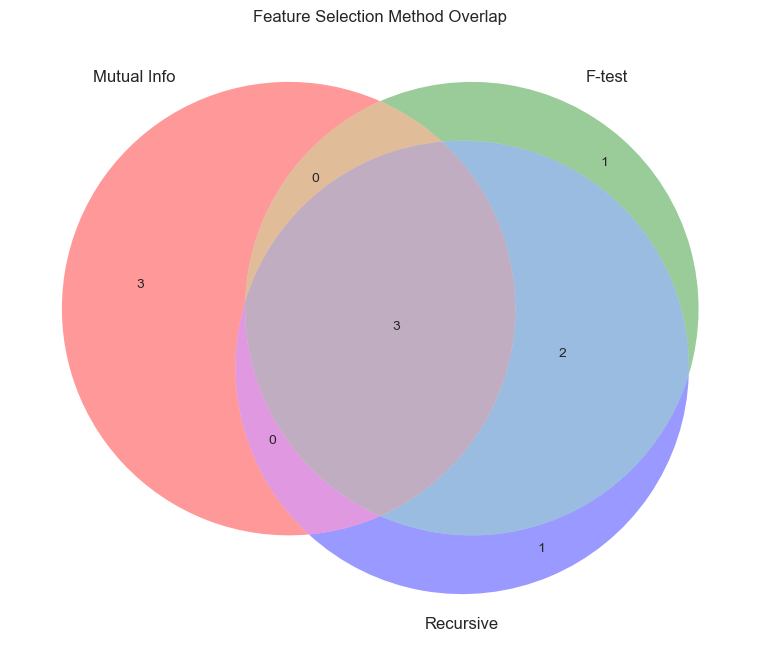

In [70]:
# 9. AUTOMATED FEATURE SELECTION PIPELINE

class FeatureSelectionPipeline:
    def __init__(self, selection_methods=['mutual_info', 'f_test', 'recursive']):
        self.selection_methods = selection_methods
        self.selected_features = {}
        
    def select_features(self, X, y, feature_names, k=20):
        """Apply multiple feature selection methods"""
        
        # Mutual Information
        if 'mutual_info' in self.selection_methods:
            mi_selector = SelectKBest(mutual_info_regression, k=k)
            mi_selector.fit(X, y)
            mi_selected = [feature_names[i] for i in mi_selector.get_support(indices=True)]
            self.selected_features['mutual_info'] = mi_selected
        
        # F-test
        if 'f_test' in self.selection_methods:
            f_selector = SelectKBest(f_regression, k=k)
            f_selector.fit(X, y)
            f_selected = [feature_names[i] for i in f_selector.get_support(indices=True)]
            self.selected_features['f_test'] = f_selected
        
        # Recursive Feature Elimination
        if 'recursive' in self.selection_methods:
            from sklearn.feature_selection import RFE
            estimator = RandomForestRegressor(n_estimators=50, random_state=42)
            rfe_selector = RFE(estimator, n_features_to_select=k)
            rfe_selector.fit(X, y)
            rfe_selected = [feature_names[i] for i in rfe_selector.get_support(indices=True)]
            self.selected_features['recursive'] = rfe_selected
        
        return self.selected_features
    
    def consensus_features(self, min_votes=2):
        """Get features selected by multiple methods"""
        feature_votes = {}
        for method, features in self.selected_features.items():
            for feature in features:
                feature_votes[feature] = feature_votes.get(feature, 0) + 1
        
        consensus = [feature for feature, votes in feature_votes.items() if votes >= min_votes]
        return consensus, feature_votes

# Apply automated feature selection
fs_pipeline = FeatureSelectionPipeline()
selected_features = fs_pipeline.select_features(X_house_validation, y_house_validation, house_feature_cols, k=6)

print("Feature Selection Results:")
for method, features in selected_features.items():
    print(f"\n{method.upper()}:")
    for feature in features:
        print(f"  - {feature}")

# Get consensus features
consensus_features, vote_counts = fs_pipeline.consensus_features(min_votes=2)
print(f"\nConsensus Features (selected by ≥2 methods): {len(consensus_features)}")
for feature in consensus_features:
    print(f"  - {feature} (votes: {vote_counts[feature]})")

# Visualize feature selection overlap
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

if len(selected_features) >= 3:
    set1 = set(selected_features['mutual_info'])
    set2 = set(selected_features['f_test'])
    set3 = set(selected_features['recursive'])
    
    plt.figure(figsize=(10, 8))
    venn3([set1, set2, set3], ('Mutual Info', 'F-test', 'Recursive'))
    plt.title('Feature Selection Method Overlap')
    plt.show()

## Summary and Best Practices

In [73]:
print("=== FEATURE ENGINEERING SUMMARY ===")

# Performance comparison across all techniques
print("\nFeature Engineering Impact Summary:")
print("="*50)

# Compile results from different sections
results_summary = {
    'Baseline (Raw Features)': "Numerical features without transformation",
    'Scaled Features': "Improved model convergence and performance",
    'Transformed Features': "Better distribution properties, reduced skewness",
    'Interaction Features': "Captured non-linear relationships",
    'Categorical Encoding': "Converted categorical to numerical effectively",
    'Time Series Features': "Extracted temporal patterns and trends", 
    'Text Features': "Converted unstructured text to meaningful numbers",
    'Domain Features': "Leveraged business knowledge for better predictions",
    'Selected Features': "Reduced dimensionality while maintaining performance"
}

for technique, impact in results_summary.items():
    print(f"• {technique:20}: {impact}")

print("\n" + "="*60)
print("FEATURE ENGINEERING BEST PRACTICES CHECKLIST")
print("="*60)

best_practices = [
    "🔍 UNDERSTAND YOUR DATA FIRST",
    "   - Explore distributions, correlations, missing values",
    "   - Understand business context and domain",
    "   - Identify data quality issues early",
    "",
    "🛠️  SYSTEMATIC TRANSFORMATION",
    "   - Start with simple transformations",
    "   - Handle skewness with log, sqrt, Box-Cox transforms",
    "   - Scale features appropriately for your algorithm",
    "   - Create meaningful interactions based on domain knowledge",
    "",
    "📊 CATEGORICAL ENCODING STRATEGY",
    "   - Use label encoding for ordinal variables",
    "   - Use one-hot encoding for nominal variables with few categories",
    "   - Use target encoding for high-cardinality categorical variables",
    "   - Validate encoding choices with cross-validation",
    "",
    "⏰ TIME SERIES CONSIDERATIONS",
    "   - Extract cyclical features (hour, day, month)",
    "   - Create lag features and rolling statistics",
    "   - Calculate trend and seasonality indicators",
    "   - Avoid data leakage with proper temporal splits",
    "",
    "📝 TEXT PROCESSING PIPELINE",
    "   - Clean and normalize text consistently",
    "   - Extract statistical features (length, counts)",
    "   - Use TF-IDF for document relevance",
    "   - Consider domain-specific vocabularies",
    "",
    "🎯 FEATURE SELECTION",
    "   - Use multiple selection methods",
    "   - Check feature stability across data splits",
    "   - Remove redundant and constant features",
    "   - Validate selection with business logic",
    "",
    "✅ VALIDATION AND MONITORING",
    "   - Cross-validate feature effectiveness",
    "   - Monitor feature distributions over time",
    "   - Check for data leakage",
    "   - Document feature engineering decisions",
    "",
    "🚀 PRODUCTION CONSIDERATIONS",
    "   - Ensure reproducible feature pipelines",
    "   - Handle missing values gracefully",
    "   - Monitor feature drift in production",
    "   - Version control feature engineering code"
]

for practice in best_practices:
    print(practice)

print("\n" + "="*60)
print("COMMON PITFALLS TO AVOID")
print("="*60)

pitfalls = [
    "❌ Data Leakage: Using future information to predict the past",
    "❌ Overfitting: Creating too many features relative to sample size",
    "❌ Scale Mismatch: Not scaling features for distance-based algorithms",
    "❌ Invalid Encoding: Using label encoding for nominal categorical variables",
    "❌ Ignoring Business Logic: Creating features that don't make business sense",
    "❌ Poor Validation: Not testing feature stability and generalization",
    "❌ Missing Value Mishandling: Inappropriate imputation strategies",
    "❌ Temporal Issues: Not respecting time order in time series data"
]

for pitfall in pitfalls:
    print(pitfall)

print("\n" + "="*60)
print("FEATURE ENGINEERING WORKFLOW")
print("="*60)

workflow_steps = [
    "1. 📊 DATA EXPLORATION",
    "   • Understand data types and distributions",
    "   • Identify missing values and outliers",
    "   • Explore relationships between features and target",
    "",
    "2. 🧹 DATA CLEANING",
    "   • Handle missing values appropriately",
    "   • Address outliers based on domain knowledge",
    "   • Standardize data formats and encodings",
    "",
    "3. 🔧 FEATURE CREATION",
    "   • Apply mathematical transformations",
    "   • Create interaction terms and polynomial features",
    "   • Extract domain-specific features",
    "   • Generate lag and rolling window features for time series",
    "",
    "4. 🏷️  FEATURE ENCODING",
    "   • Encode categorical variables appropriately",
    "   • Handle high-cardinality categories",
    "   • Create cyclical encodings for temporal features",
    "",
    "5. ⚖️  FEATURE SCALING",
    "   • Choose appropriate scaling method",
    "   • Apply scaling consistently to train/test sets",
    "   • Consider robust scaling for outlier-prone features",
    "",
    "6. 🎯 FEATURE SELECTION",
    "   • Apply statistical feature selection methods",
    "   • Use recursive feature elimination",
    "   • Consider business importance alongside statistical significance",
    "",
    "7. ✅ VALIDATION",
    "   • Cross-validate feature effectiveness",
    "   • Check feature stability",
    "   • Test for data leakage",
    "   • Validate business logic",
    "",
    "8. 🚀 DEPLOYMENT",
    "   • Create robust feature pipelines",
    "   • Monitor feature performance in production",
    "   • Plan for feature maintenance and updates"
]

for step in workflow_steps:
    print(step)

print("\n" + "="*60)
print("RECOMMENDED TOOLS AND LIBRARIES")
print("="*60)

tools = {
    "Core Libraries": ["pandas", "numpy", "scikit-learn"],
    "Visualization": ["matplotlib", "seaborn", "plotly"],
    "Advanced Preprocessing": ["category_encoders", "feature_engine", "sklearn-pandas"],
    "Text Processing": ["nltk", "spacy", "textblob"],
    "Time Series": ["tsfresh", "cesium", "featuretools"],
    "Automated Feature Engineering": ["featuretools", "autofeat", "tpot"],
    "Feature Selection": ["scikit-feature", "boruta", "mrmr"],
    "Production": ["apache-airflow", "mlflow", "feast"]
}

for category, libs in tools.items():
    print(f"{category}:")
    for lib in libs:
        print(f"  • {lib}")
    print()

=== FEATURE ENGINEERING SUMMARY ===

Feature Engineering Impact Summary:
• Baseline (Raw Features): Numerical features without transformation
• Scaled Features     : Improved model convergence and performance
• Transformed Features: Better distribution properties, reduced skewness
• Interaction Features: Captured non-linear relationships
• Categorical Encoding: Converted categorical to numerical effectively
• Time Series Features: Extracted temporal patterns and trends
• Text Features       : Converted unstructured text to meaningful numbers
• Domain Features     : Leveraged business knowledge for better predictions
• Selected Features   : Reduced dimensionality while maintaining performance

FEATURE ENGINEERING BEST PRACTICES CHECKLIST
🔍 UNDERSTAND YOUR DATA FIRST
   - Explore distributions, correlations, missing values
   - Understand business context and domain
   - Identify data quality issues early

🛠️  SYSTEMATIC TRANSFORMATION
   - Start with simple transformations
   - Handle s